In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### DataSet:

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [9]:
# List with columns names for the df
cols = ['fLength', 'fWidht', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

# df from csv read and headed
df = pd.read_csv('data/magic04.data', names=cols)
df.head()

fLength    fWidht   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [10]:
# Label Encoding for Gamma 'g'
df['class'] = (df['class'] == 'g').astype(int)

In [11]:
df.head()

fLength    fWidht   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

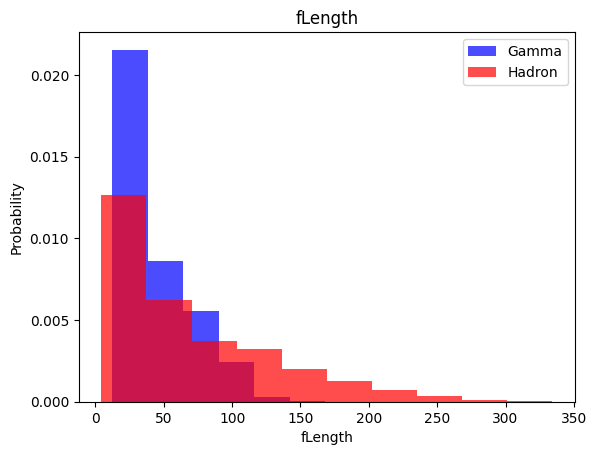

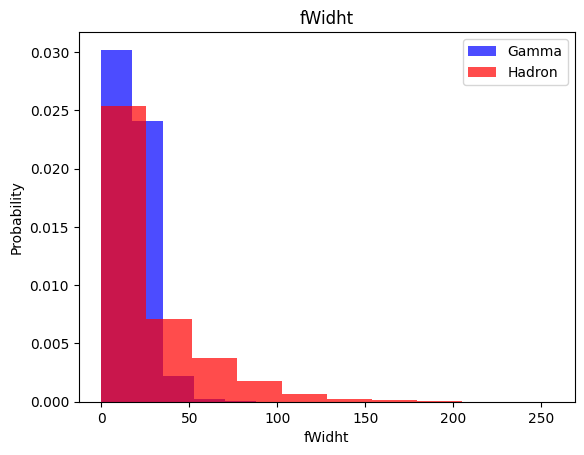

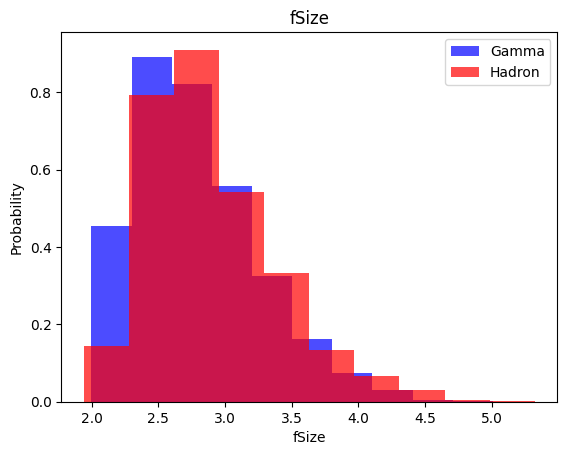

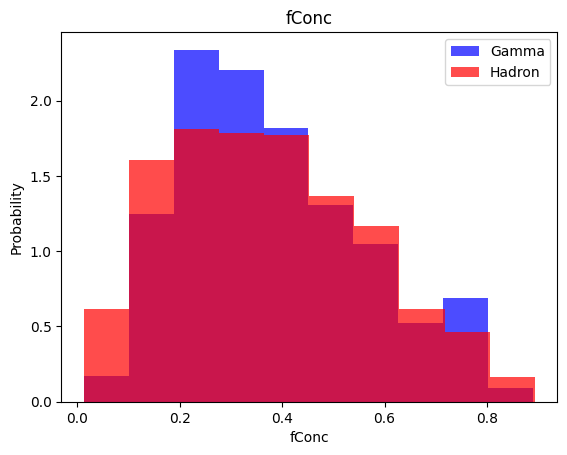

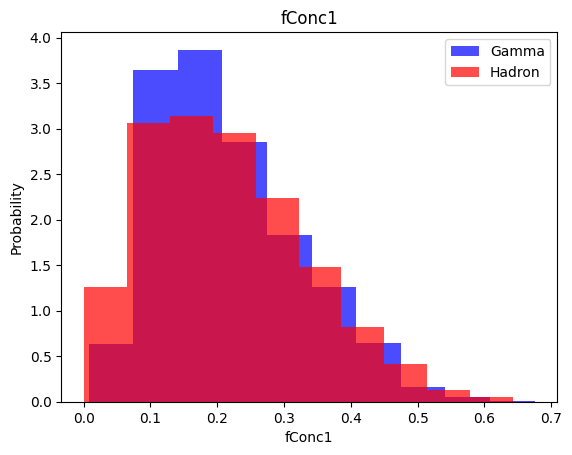

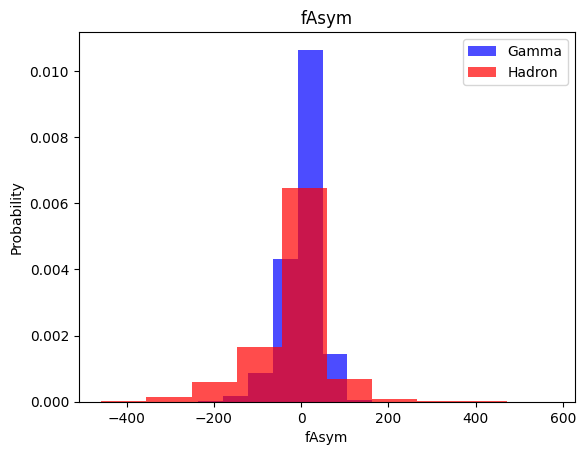

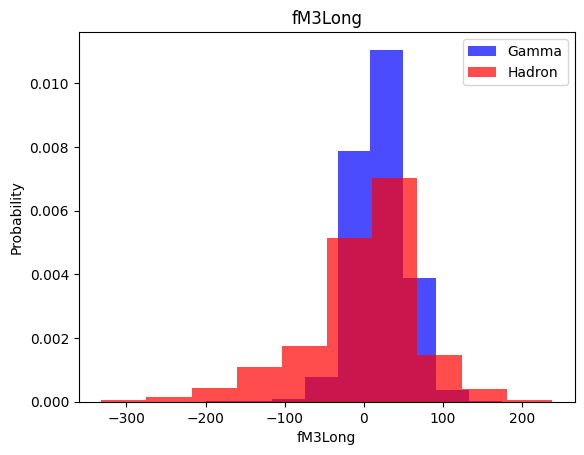

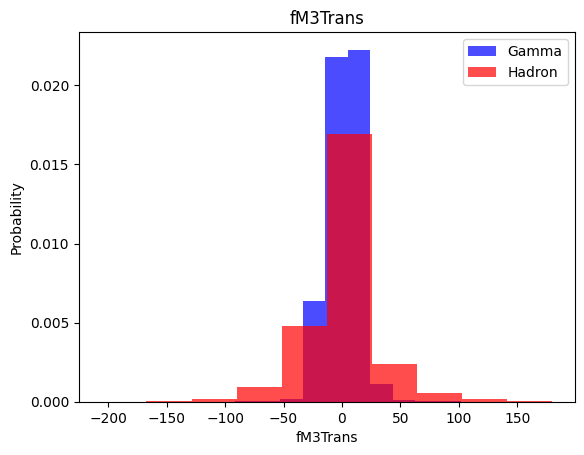

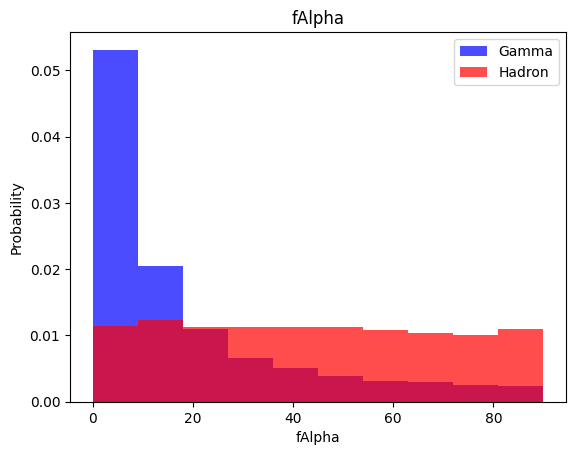

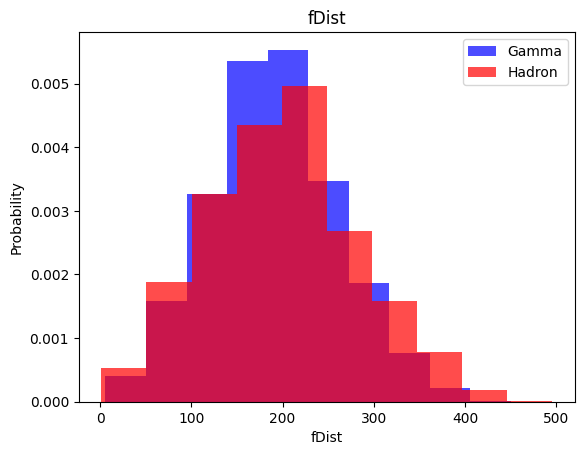

In [7]:
# Loop plotting histograms for each DataSet Attribute, normalized with probabilities instead of raw count (density=True)
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='Gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 0][label], color='red', label='Hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, Validation and Test Datasets

In [12]:
# Splitting the dataset in 3 portions for training (60%), validation (20%) and testing (20%) of the model
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [13]:
# Function made to scale the dataframe Features values (X) and to oversample the Label values (Y)
# Oversample is used for distribute evenly the Features and Label values in order to prevent biased predictions in the model
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    data = np.hstack((X, np.reshape(Y, (-1, 1))))

    return data, X, Y

In [14]:
# Each portion of the splitted dataframe is passed to the Scale_dataset function and the scaled data, features and labels are saved
# in 3 different variables for each stage of the model development (Training, Validation and Testing)
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

In [15]:
# Confirmation for the oversampling (The labeling categories count should be almost equal)
print(f'The number of records for model training is: {len(Y_train)}')
print(f'The number of records classified as Gamma is: {sum(Y_train == 1)}')
print(f'The number of records classified as Hadron is: {sum(Y_train == 0)}')

The number of records for model training is: 14900
The number of records classified as Gamma is: 7450
The number of records classified as Hadron is: 7450


In [16]:
# Confirmation for the DataFrame testing randomness
print(f'The number of records for model training is: {len(Y_test)}')
print(f'The number of records classified as Gamma is: {sum(Y_test == 1)}')
print(f'The number of records classified as Hadron is: {sum(Y_test == 0)}')

The number of records for model training is: 3804
The number of records classified as Gamma is: 2417
The number of records classified as Hadron is: 1387


## K Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
# KNeighbors instantiation and training
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# Model prediction (Y) for X values
Y_pred = knn_model.predict(X_test)

In [17]:
# Model performance report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1341
           1       0.83      0.89      0.86      2463

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
# Naiva Bayes instantiation and training
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [20]:
# Model prediction (Y) for X values and performance report
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1341
           1       0.74      0.89      0.81      2463

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



## Log Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

LogisticRegression()

In [23]:
Y_pred = log_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1341
           1       0.85      0.83      0.84      2463

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



## Support Vector Machines

In [24]:
from sklearn.svm import SVC

In [25]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [26]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1341
           1       0.90      0.89      0.89      2463

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Net

In [18]:
import tensorflow as tf

In [23]:
# Creation and structuration for the Neural Network Model
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape =(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Neural Network compilation - Params: Optimizer (Learning rate)
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])

    history = nn_model.fit(
        X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2
        )
    
    return nn_model, history

In [24]:

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_history(history):
    fig, axes = plt.subplots(2, 1, figsize=(8, 6))

    # Plotting the loss over all the different Epochs (Training Cycles)
    axes[0].plot(history.history['loss'], label='loss')
    axes[0].plot(history.history['val_loss'], label='val_loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Binary crossentropy')
    axes[0].legend()
    axes[0].grid(True)

    # Plotting the accuracy over all the Epochs
    axes[1].plot(history.history['accuracy'], label='accuracy')
    axes[1].plot(history.history['val_accuracy'], label='val_accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()



Nodes:      16
DropOut:    0
LR:         0.1
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.8160 - val_loss: 0.6733 - val_accuracy: 0.6010
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8263 - val_loss: 0.5937 - val_accuracy: 0.6208
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.8429 - val_loss: 0.7453 - val_accuracy: 0.5839
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8387 - val_loss: 0.3780 - val_accuracy: 0.7503
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8439 - val_loss: 0.6485 - val_accuracy: 0.6577
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8451 - val_loss: 0.5463 - val_accuracy: 0.6591
Epoch 7/100
373/373 [==============================] - 1s 1ms/step - loss: 0.366

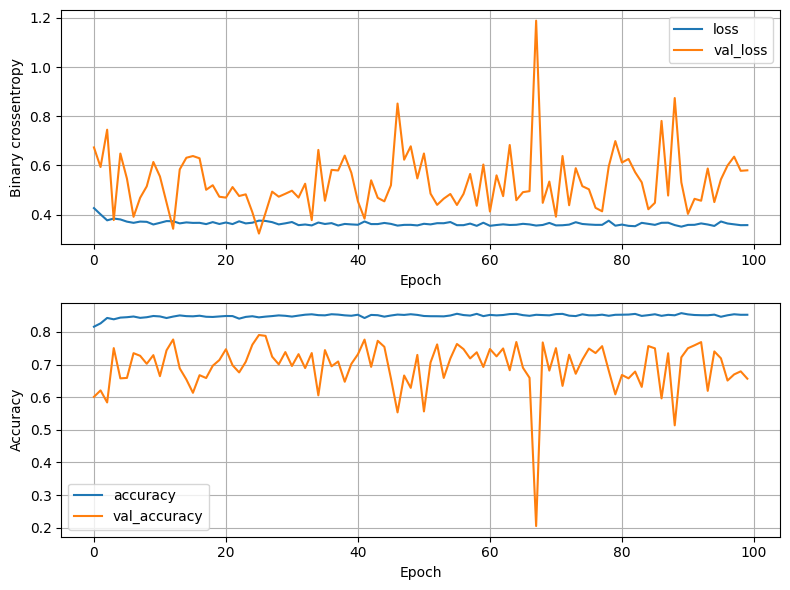

119/119 [==============================] - 0s 888us/step - loss: 0.3453 - accuracy: 0.8657
[0.34526684880256653, 0.8656677007675171]

Nodes:      16
DropOut:    0
LR:         0.1
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8120 - val_loss: 0.3795 - val_accuracy: 0.8436
Epoch 2/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8363 - val_loss: 0.3990 - val_accuracy: 0.7889
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8387 - val_loss: 0.4916 - val_accuracy: 0.7433
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8367 - val_loss: 0.8611 - val_accuracy: 0.6564
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8469 - val_loss: 0.5995 - val_accuracy: 0.6762
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3557 - accura

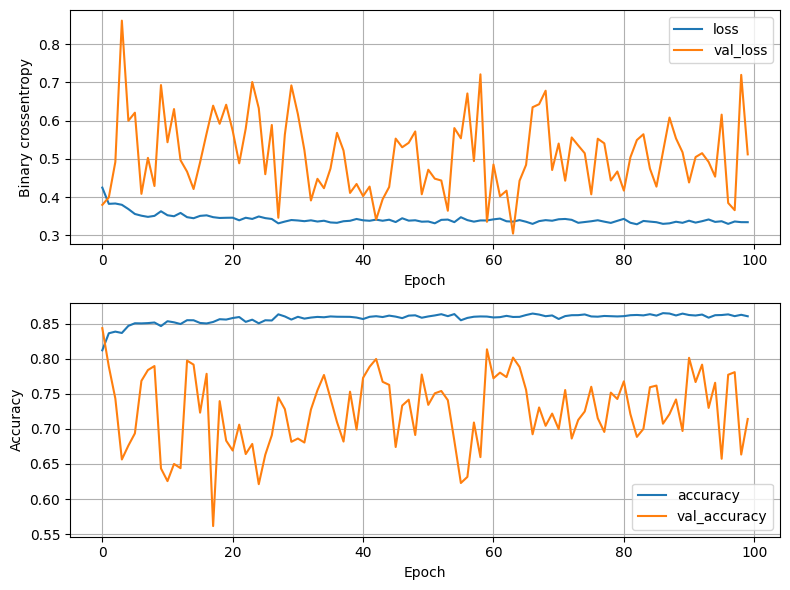

119/119 [==============================] - 0s 877us/step - loss: 0.3285 - accuracy: 0.8707
[0.32849204540252686, 0.8706624507904053]

Nodes:      16
DropOut:    0
LR:         0.1
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8086 - val_loss: 0.6300 - val_accuracy: 0.7215
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8430 - val_loss: 0.5154 - val_accuracy: 0.7654
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8513 - val_loss: 0.4073 - val_accuracy: 0.7557
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8499 - val_loss: 0.5902 - val_accuracy: 0.7151
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8539 - val_loss: 0.4175 - val_accuracy: 0.7584
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8497 

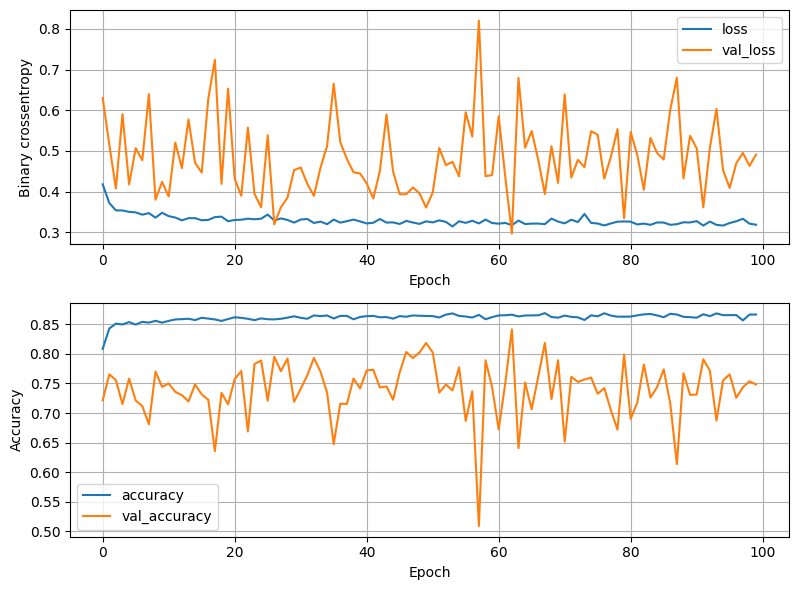

119/119 [==============================] - 0s 882us/step - loss: 0.3120 - accuracy: 0.8780
[0.3119829297065735, 0.8780231475830078]

Nodes:      16
DropOut:    0
LR:         0.005
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.4249 - accuracy: 0.8064 - val_loss: 0.6035 - val_accuracy: 0.7067
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8424 - val_loss: 0.5239 - val_accuracy: 0.7487
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.8527 - val_loss: 0.5229 - val_accuracy: 0.7403
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8596 - val_loss: 0.4964 - val_accuracy: 0.7463
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8602 - val_loss: 0.5137 - val_accuracy: 0.7406
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3246 - accur

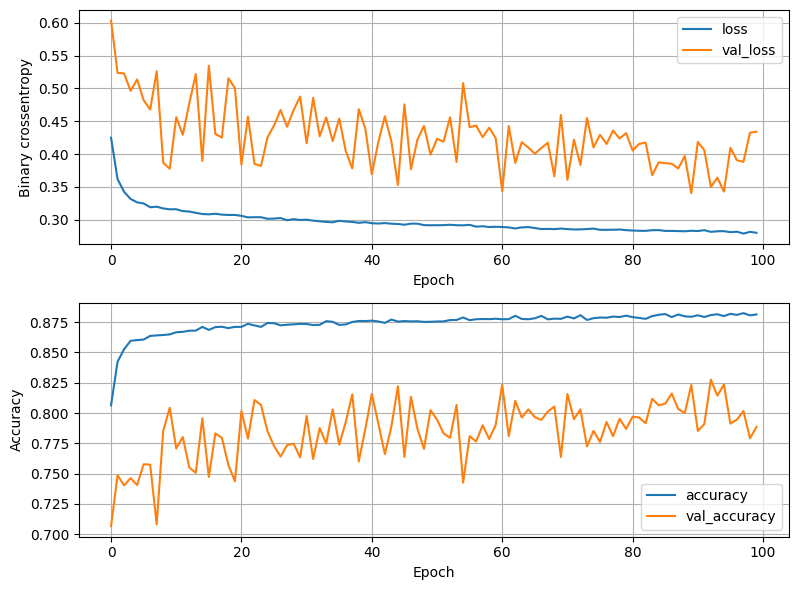

119/119 [==============================] - 0s 883us/step - loss: 0.3076 - accuracy: 0.8788
[0.3075782358646393, 0.878811776638031]

Nodes:      16
DropOut:    0
LR:         0.005
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4475 - accuracy: 0.7866 - val_loss: 0.5210 - val_accuracy: 0.7409
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.8457 - val_loss: 0.5515 - val_accuracy: 0.7305
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8575 - val_loss: 0.4967 - val_accuracy: 0.7544
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8584 - val_loss: 0.4733 - val_accuracy: 0.7597
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8623 - val_loss: 0.4057 - val_accuracy: 0.7943
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3280 - accura

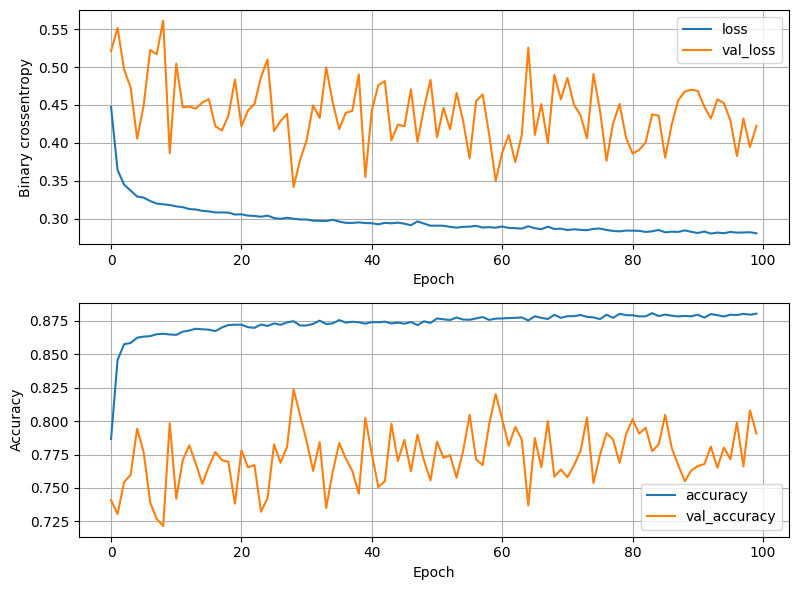

119/119 [==============================] - 0s 850us/step - loss: 0.3176 - accuracy: 0.8725
[0.3176124095916748, 0.8725026249885559]

Nodes:      16
DropOut:    0
LR:         0.005
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.4921 - accuracy: 0.7643 - val_loss: 0.5804 - val_accuracy: 0.6463
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8261 - val_loss: 0.6033 - val_accuracy: 0.6826
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8482 - val_loss: 0.5947 - val_accuracy: 0.7027
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8483 - val_loss: 0.4672 - val_accuracy: 0.7591
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8534 - val_loss: 0.5090 - val_accuracy: 0.7419
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8592

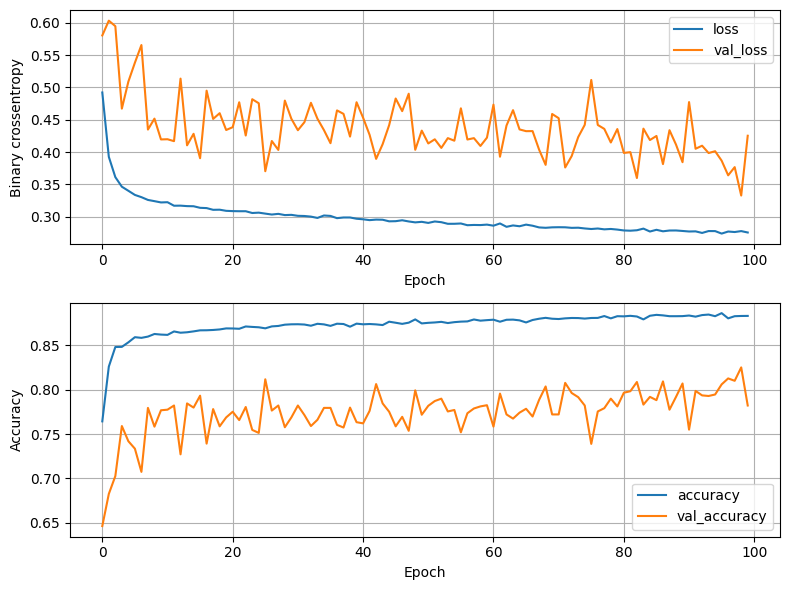

119/119 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8751
[0.31266137957572937, 0.8751314282417297]

Nodes:      16
DropOut:    0
LR:         0.001
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.4996 - accuracy: 0.7615 - val_loss: 0.6544 - val_accuracy: 0.6171
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8160 - val_loss: 0.5722 - val_accuracy: 0.6859
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8328 - val_loss: 0.5984 - val_accuracy: 0.6903
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8420 - val_loss: 0.4874 - val_accuracy: 0.7648
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3589 - accuracy: 0.8463 - val_loss: 0.4933 - val_accuracy: 0.7614
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3527 - accura

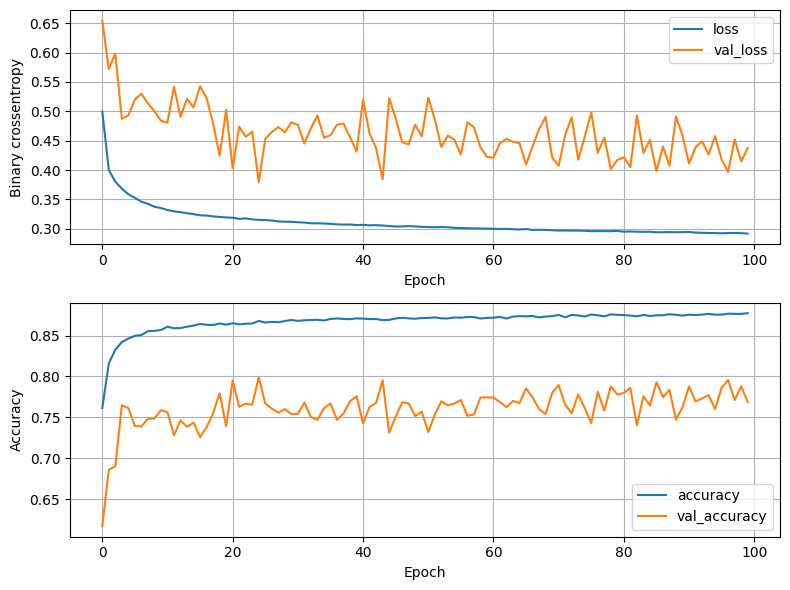

119/119 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8770
[0.3054054081439972, 0.8769716024398804]

Nodes:      16
DropOut:    0
LR:         0.001
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.7516 - val_loss: 0.6323 - val_accuracy: 0.6148
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.7974 - val_loss: 0.6323 - val_accuracy: 0.6292
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8070 - val_loss: 0.5894 - val_accuracy: 0.6523
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8179 - val_loss: 0.6154 - val_accuracy: 0.6554
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8293 - val_loss: 0.5617 - val_accuracy: 0.7104
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3754 - accurac

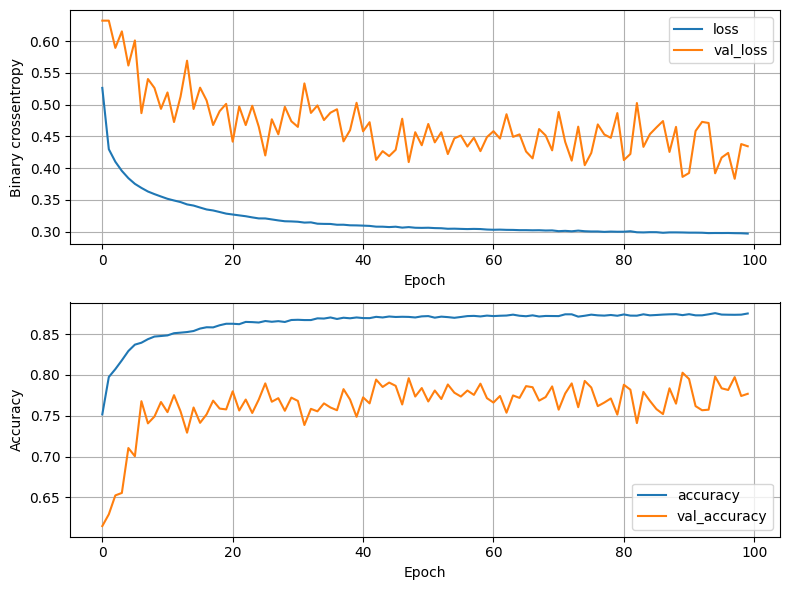

119/119 [==============================] - 0s 917us/step - loss: 0.3053 - accuracy: 0.8746
[0.3052806556224823, 0.874605655670166]

Nodes:      16
DropOut:    0
LR:         0.001
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5504 - accuracy: 0.7538 - val_loss: 0.6835 - val_accuracy: 0.5772
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8036 - val_loss: 0.6286 - val_accuracy: 0.6228
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8173 - val_loss: 0.6060 - val_accuracy: 0.6446
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8242 - val_loss: 0.5693 - val_accuracy: 0.6738
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8290 - val_loss: 0.5567 - val_accuracy: 0.6940
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8354 

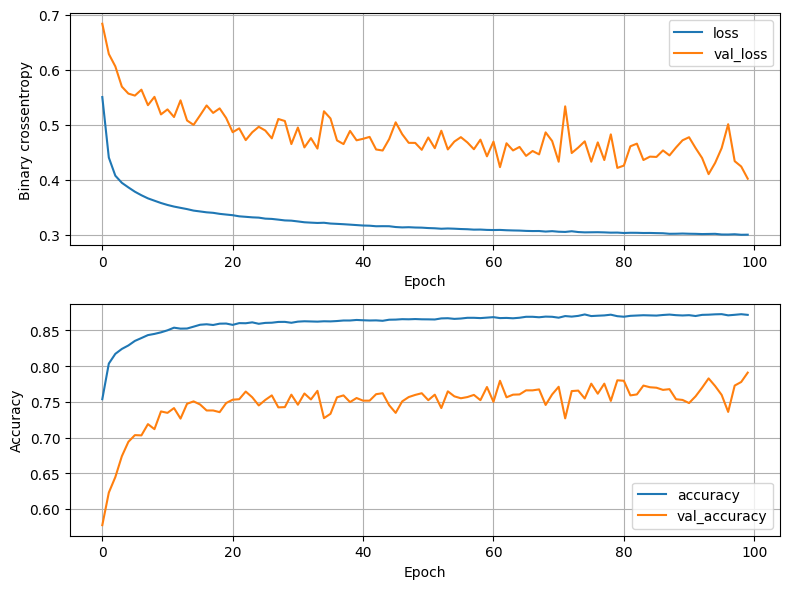

119/119 [==============================] - 0s 872us/step - loss: 0.3092 - accuracy: 0.8699
[0.3092203736305237, 0.8698738217353821]

Nodes:      16
DropOut:    0.2
LR:         0.1
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.7427 - val_loss: 0.5734 - val_accuracy: 0.8221
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7440 - val_loss: 0.8044 - val_accuracy: 0.3644
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.7478 - val_loss: 0.5682 - val_accuracy: 0.5936
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.7633 - val_loss: 0.6317 - val_accuracy: 0.5624
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.7558 - val_loss: 0.7410 - val_accuracy: 0.5883
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.5179 - accur

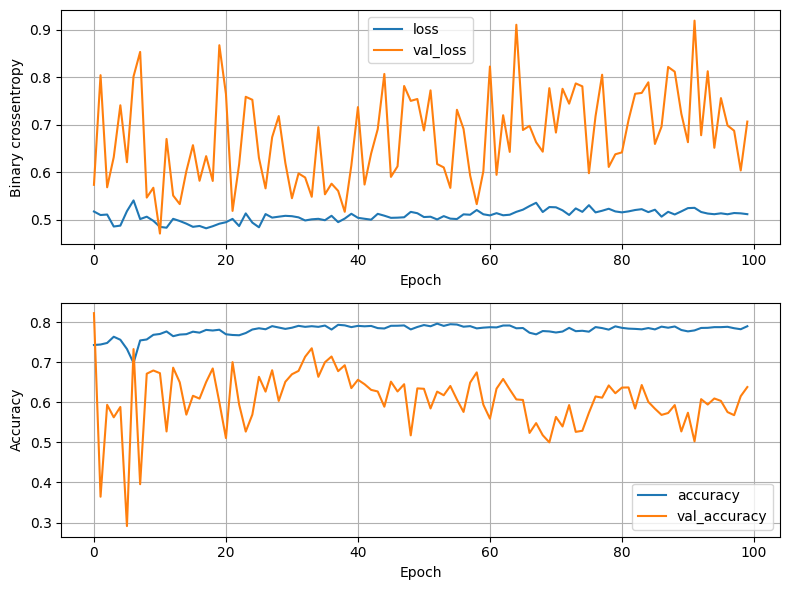

119/119 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8394
[0.4580862820148468, 0.839379608631134]

Nodes:      16
DropOut:    0.2
LR:         0.1
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4865 - accuracy: 0.7741 - val_loss: 0.5732 - val_accuracy: 0.6503
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7755 - val_loss: 0.5812 - val_accuracy: 0.5950
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.7908 - val_loss: 0.7147 - val_accuracy: 0.7081
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.7863 - val_loss: 0.4764 - val_accuracy: 0.7252
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7918 - val_loss: 0.8274 - val_accuracy: 0.4866
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy

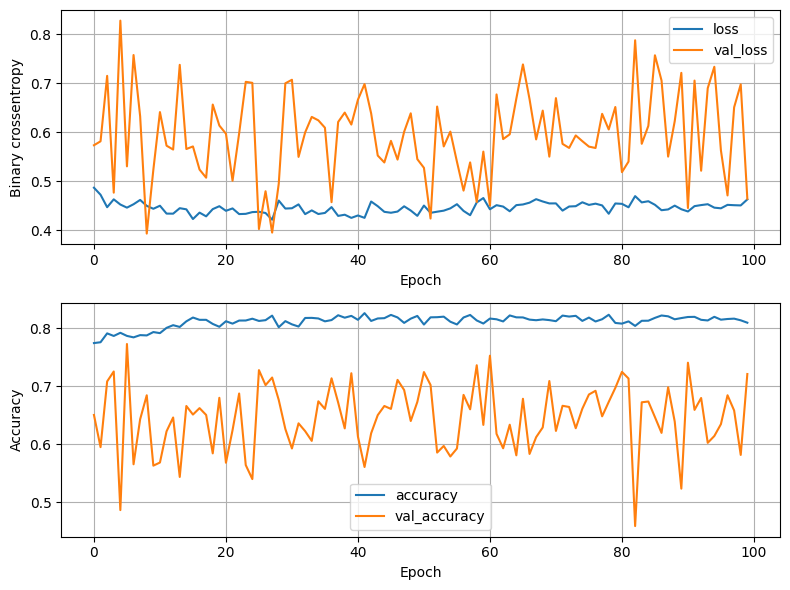

119/119 [==============================] - 0s 875us/step - loss: 0.4301 - accuracy: 0.8594
[0.43006205558776855, 0.859358549118042]

Nodes:      16
DropOut:    0.2
LR:         0.1
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.7689 - val_loss: 0.6118 - val_accuracy: 0.6386
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8104 - val_loss: 0.3961 - val_accuracy: 0.7624
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8132 - val_loss: 0.7632 - val_accuracy: 0.5812
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8148 - val_loss: 0.4331 - val_accuracy: 0.7436
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8147 - val_loss: 0.5164 - val_accuracy: 0.7339
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8244

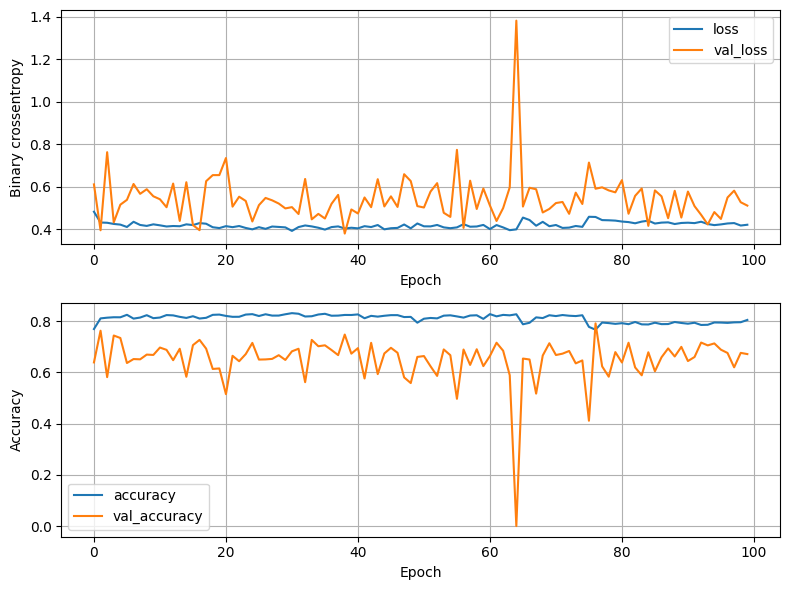

119/119 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8515
[0.3710542917251587, 0.8514721393585205]

Nodes:      16
DropOut:    0.2
LR:         0.005
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.4613 - accuracy: 0.7888 - val_loss: 0.6112 - val_accuracy: 0.6493
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8204 - val_loss: 0.5972 - val_accuracy: 0.6832
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8345 - val_loss: 0.5570 - val_accuracy: 0.7252
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8389 - val_loss: 0.5321 - val_accuracy: 0.7128
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8442 - val_loss: 0.4221 - val_accuracy: 0.7674
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3652 - accur

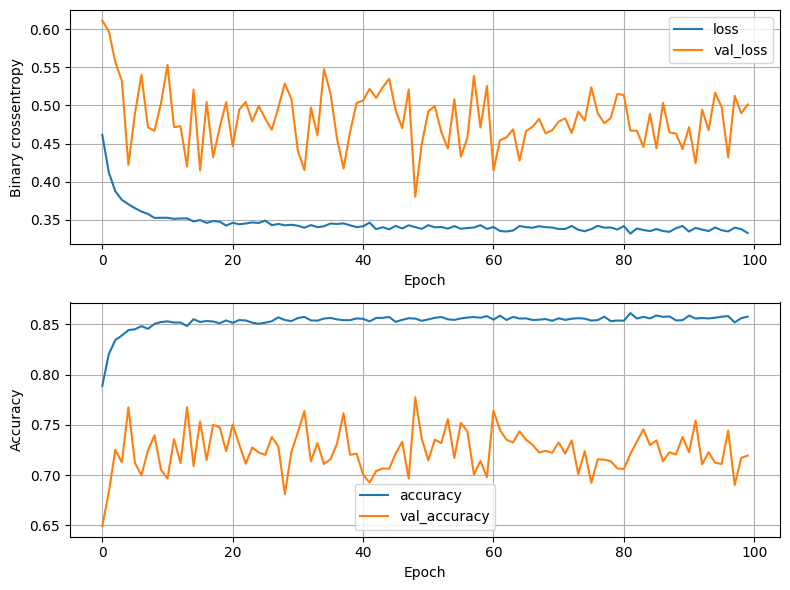

119/119 [==============================] - 0s 914us/step - loss: 0.3134 - accuracy: 0.8733
[0.3134244382381439, 0.8732912540435791]

Nodes:      16
DropOut:    0.2
LR:         0.005
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4791 - accuracy: 0.7745 - val_loss: 0.5646 - val_accuracy: 0.6826
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8154 - val_loss: 0.5101 - val_accuracy: 0.7188
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8309 - val_loss: 0.5438 - val_accuracy: 0.7164
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8397 - val_loss: 0.5522 - val_accuracy: 0.6923
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8410 - val_loss: 0.5082 - val_accuracy: 0.7275
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3666 - acc

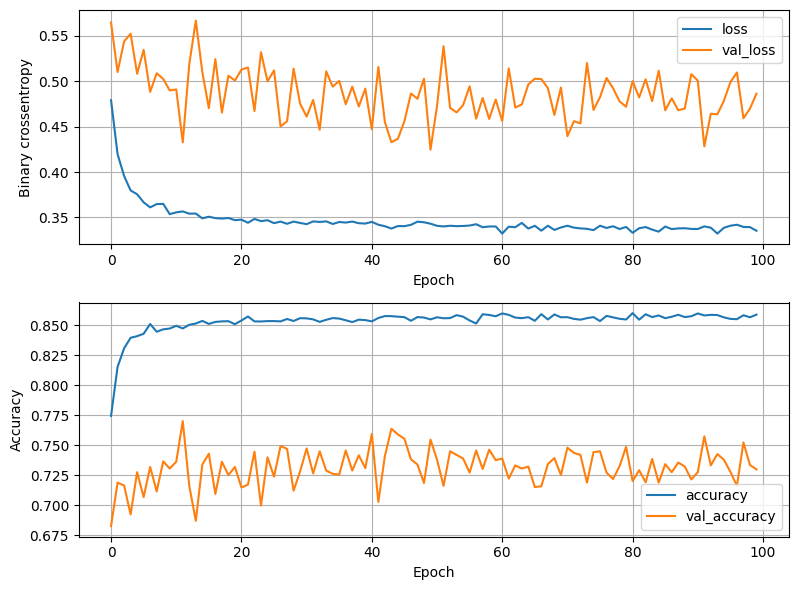

119/119 [==============================] - 0s 897us/step - loss: 0.3144 - accuracy: 0.8704
[0.3144003748893738, 0.8703995943069458]

Nodes:      16
DropOut:    0.2
LR:         0.005
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5178 - accuracy: 0.7501 - val_loss: 0.5998 - val_accuracy: 0.6799
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.8115 - val_loss: 0.5674 - val_accuracy: 0.6899
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8271 - val_loss: 0.5993 - val_accuracy: 0.6849
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8371 - val_loss: 0.4957 - val_accuracy: 0.7487
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8396 - val_loss: 0.4863 - val_accuracy: 0.7544
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.84

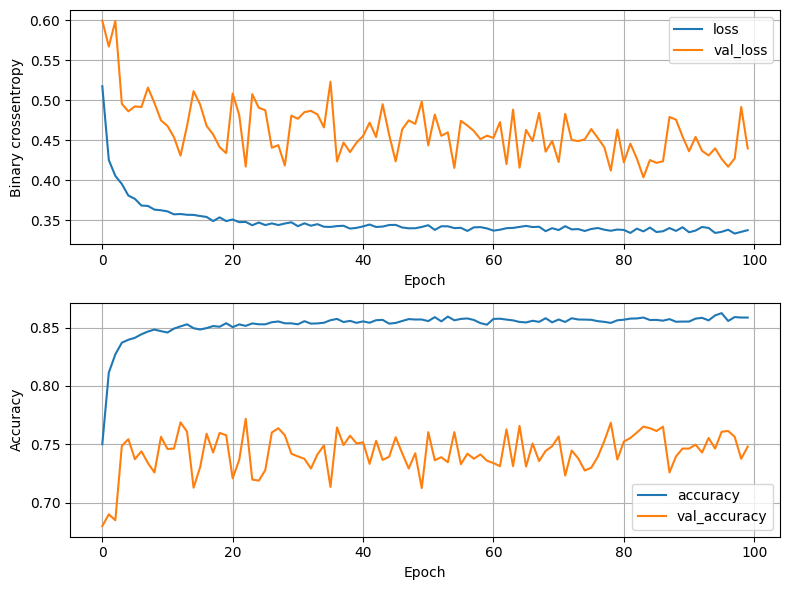

119/119 [==============================] - 0s 897us/step - loss: 0.3089 - accuracy: 0.8730
[0.30887845158576965, 0.8730283975601196]

Nodes:      16
DropOut:    0.2
LR:         0.001
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.5571 - accuracy: 0.7177 - val_loss: 0.6527 - val_accuracy: 0.6185
Epoch 2/100
373/373 [==============================] - 1s 1ms/step - loss: 0.4533 - accuracy: 0.7911 - val_loss: 0.6306 - val_accuracy: 0.6403
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8066 - val_loss: 0.6033 - val_accuracy: 0.6500
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8138 - val_loss: 0.6164 - val_accuracy: 0.6594
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8221 - val_loss: 0.5390 - val_accuracy: 0.7141
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3984 - ac

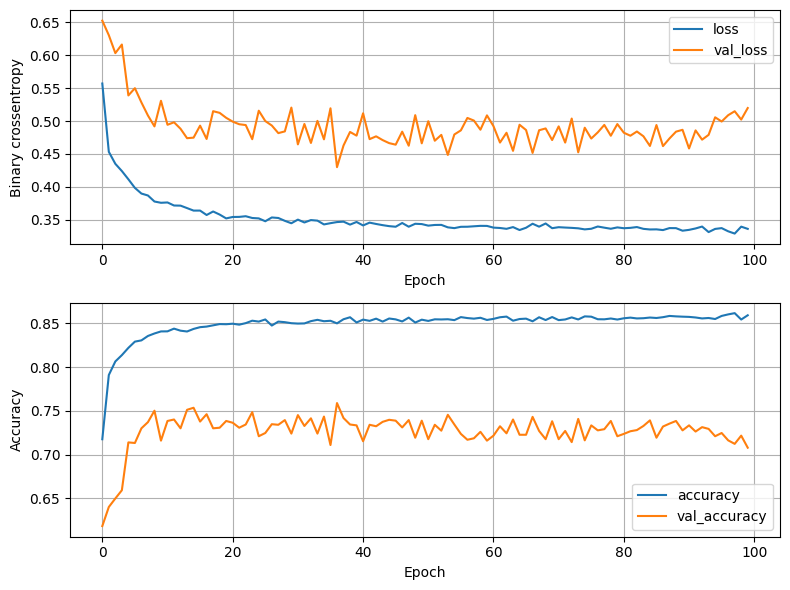

119/119 [==============================] - 0s 843us/step - loss: 0.3110 - accuracy: 0.8720
[0.3109619617462158, 0.8719768524169922]

Nodes:      16
DropOut:    0.2
LR:         0.001
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.6038 - accuracy: 0.6753 - val_loss: 0.7357 - val_accuracy: 0.5483
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.7610 - val_loss: 0.6745 - val_accuracy: 0.6178
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7880 - val_loss: 0.6371 - val_accuracy: 0.6329
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7987 - val_loss: 0.6118 - val_accuracy: 0.6490
Epoch 5/100
187/187 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8056 - val_loss: 0.6019 - val_accuracy: 0.6624
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4215 - acc

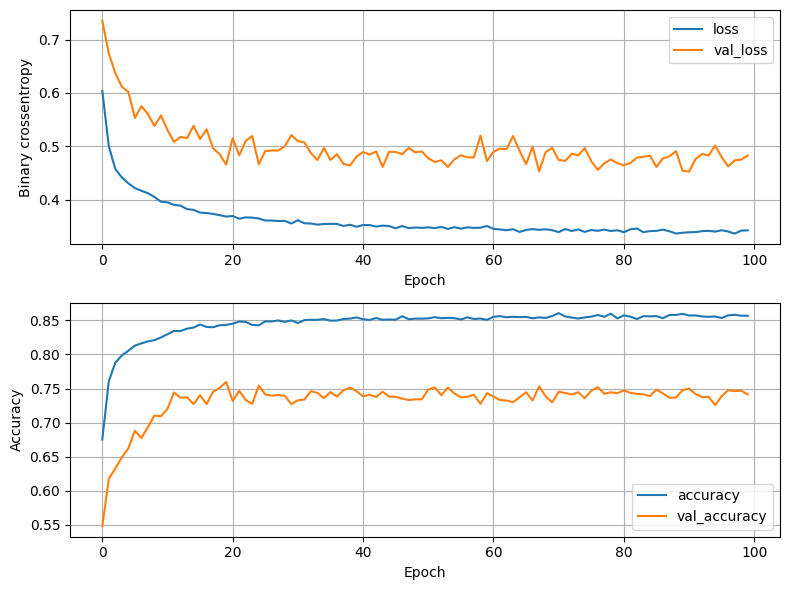

119/119 [==============================] - 0s 888us/step - loss: 0.3125 - accuracy: 0.8738
[0.3124595880508423, 0.8738170266151428]

Nodes:      16
DropOut:    0.2
LR:         0.001
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6339 - accuracy: 0.6561 - val_loss: 0.7609 - val_accuracy: 0.4631
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7516 - val_loss: 0.6663 - val_accuracy: 0.6178
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7780 - val_loss: 0.6183 - val_accuracy: 0.6497
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7909 - val_loss: 0.5964 - val_accuracy: 0.6685
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8010 - val_loss: 0.5838 - val_accuracy: 0.6735
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.80

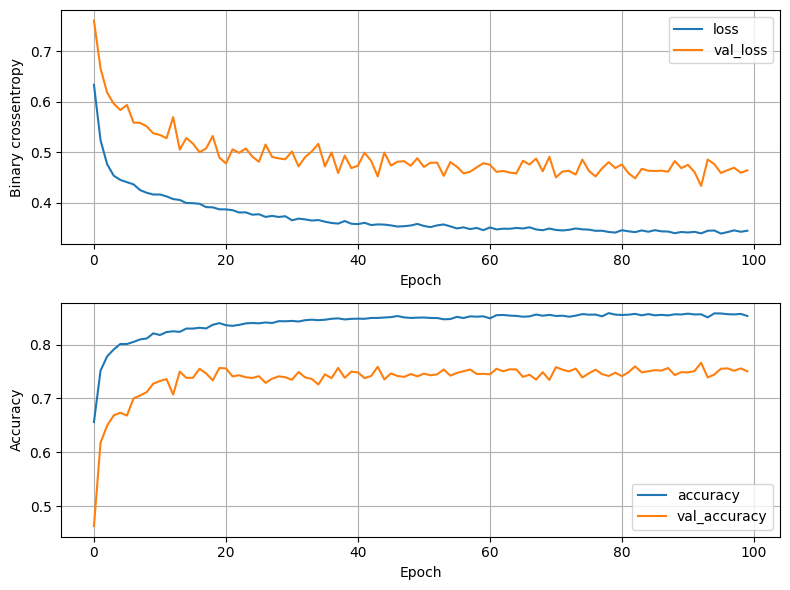

119/119 [==============================] - 0s 1ms/step - loss: 0.3169 - accuracy: 0.8746
[0.31689420342445374, 0.874605655670166]

Nodes:      32
DropOut:    0
LR:         0.1
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.8107 - val_loss: 0.7778 - val_accuracy: 0.6721
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8267 - val_loss: 0.4643 - val_accuracy: 0.8232
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8385 - val_loss: 0.8379 - val_accuracy: 0.6674
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8418 - val_loss: 0.4752 - val_accuracy: 0.7470
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8427 - val_loss: 0.7941 - val_accuracy: 0.6483
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy:

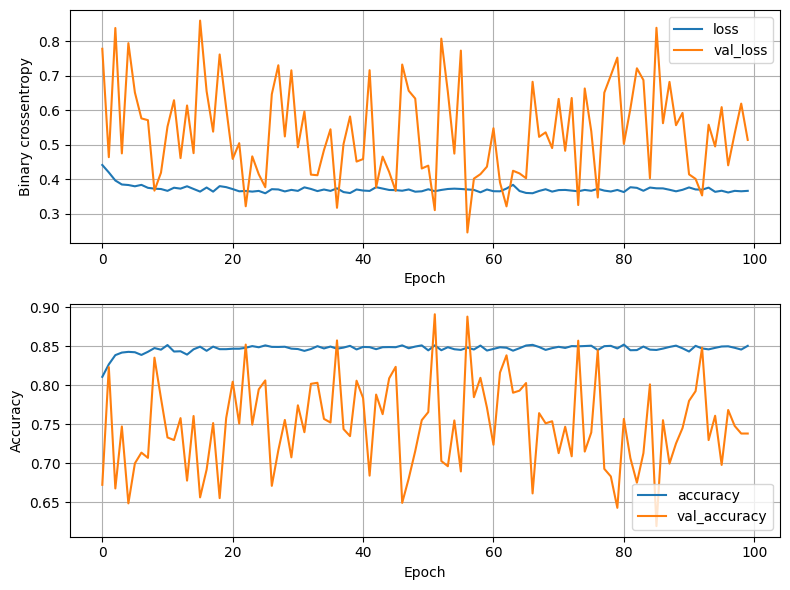

119/119 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8588
[0.35349172353744507, 0.858832836151123]

Nodes:      32
DropOut:    0
LR:         0.1
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8073 - val_loss: 0.5719 - val_accuracy: 0.7601
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8381 - val_loss: 0.3839 - val_accuracy: 0.8342
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8415 - val_loss: 0.6471 - val_accuracy: 0.7248
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8473 - val_loss: 0.5813 - val_accuracy: 0.7097
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8419 - val_loss: 0.4967 - val_accuracy: 0.7785
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy:

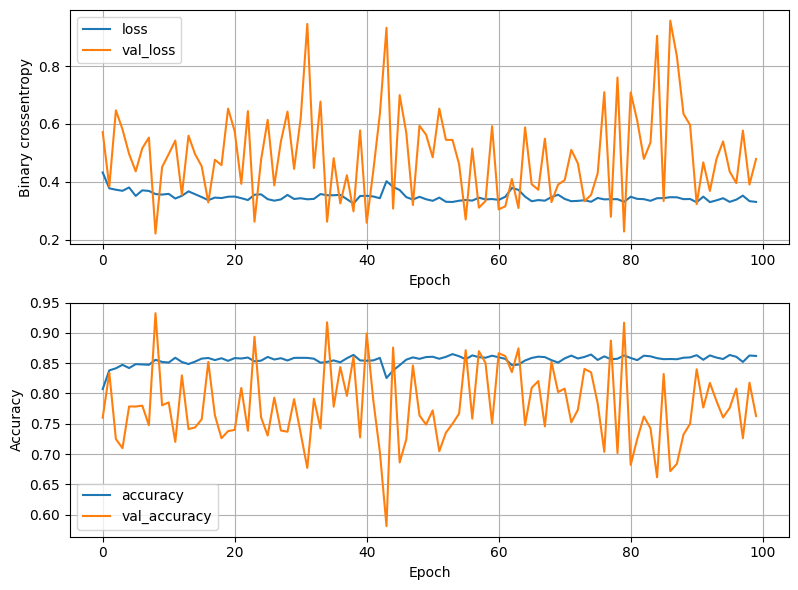

119/119 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8725
[0.31982871890068054, 0.8725026249885559]

Nodes:      32
DropOut:    0
LR:         0.1
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.4319 - accuracy: 0.8076 - val_loss: 0.5035 - val_accuracy: 0.8144
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8231 - val_loss: 0.6047 - val_accuracy: 0.6889
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8500 - val_loss: 0.4022 - val_accuracy: 0.7299
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8529 - val_loss: 0.5346 - val_accuracy: 0.7329
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8542 - val_loss: 0.5632 - val_accuracy: 0.7463
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8555 - 

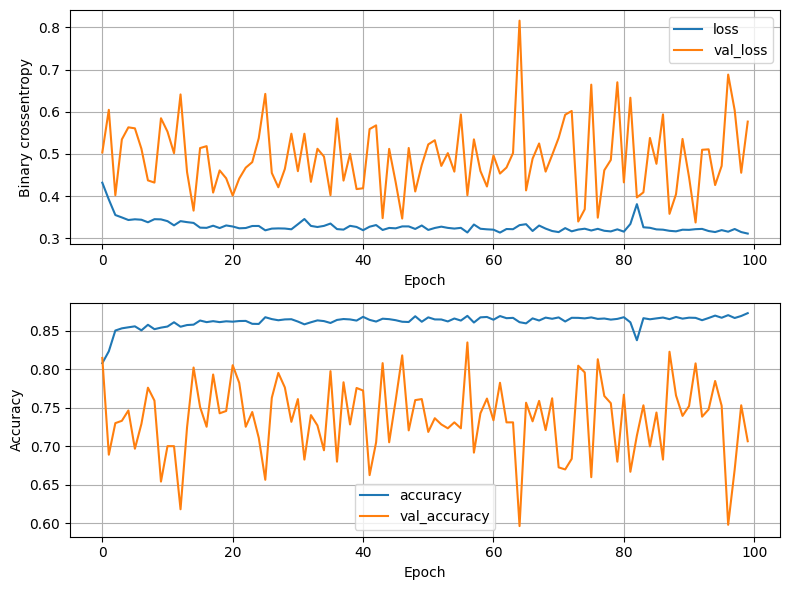

119/119 [==============================] - 0s 880us/step - loss: 0.3123 - accuracy: 0.8743
[0.31225502490997314, 0.8743427991867065]

Nodes:      32
DropOut:    0
LR:         0.005
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.3973 - accuracy: 0.8237 - val_loss: 0.4772 - val_accuracy: 0.7450
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8525 - val_loss: 0.4173 - val_accuracy: 0.7872
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8587 - val_loss: 0.4125 - val_accuracy: 0.7758
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8611 - val_loss: 0.5104 - val_accuracy: 0.7346
Epoch 5/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3208 - accuracy: 0.8622 - val_loss: 0.4421 - val_accuracy: 0.7681
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3177 - accu

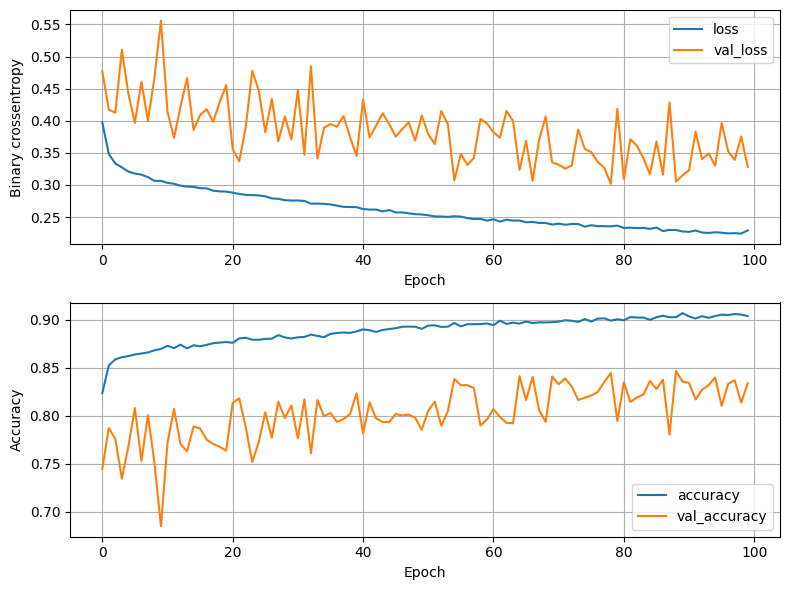

119/119 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8688
[0.37075453996658325, 0.8688222765922546]

Nodes:      32
DropOut:    0
LR:         0.005
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 3ms/step - loss: 0.4197 - accuracy: 0.8126 - val_loss: 0.5823 - val_accuracy: 0.6993
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8506 - val_loss: 0.4884 - val_accuracy: 0.7668
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3388 - accuracy: 0.8552 - val_loss: 0.4732 - val_accuracy: 0.7644
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8587 - val_loss: 0.4629 - val_accuracy: 0.7577
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8643 - val_loss: 0.4766 - val_accuracy: 0.7574
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3209 - accura

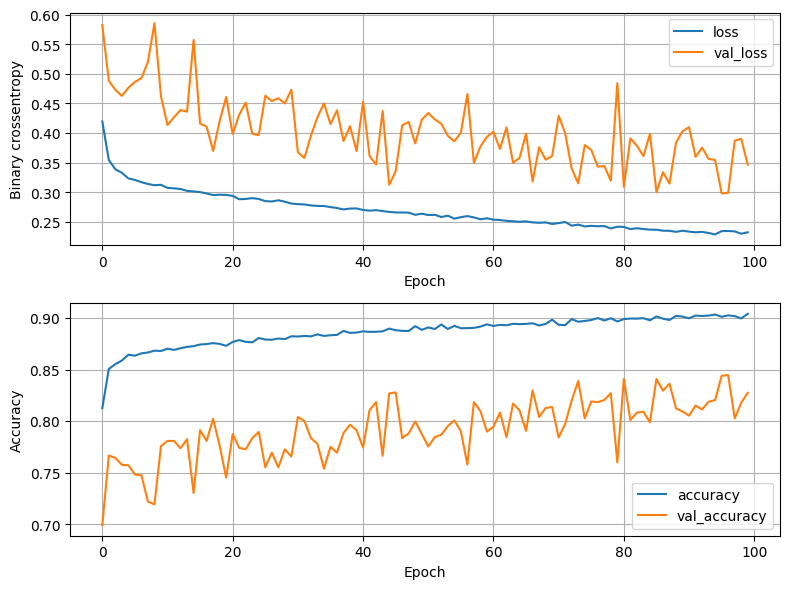

119/119 [==============================] - 0s 848us/step - loss: 0.3559 - accuracy: 0.8686
[0.35588592290878296, 0.8685594201087952]

Nodes:      32
DropOut:    0
LR:         0.005
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.8069 - val_loss: 0.5672 - val_accuracy: 0.7262
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8443 - val_loss: 0.4709 - val_accuracy: 0.7654
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.8549 - val_loss: 0.4873 - val_accuracy: 0.7607
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8609 - val_loss: 0.4969 - val_accuracy: 0.7500
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8597 - val_loss: 0.5078 - val_accuracy: 0.7346
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.862

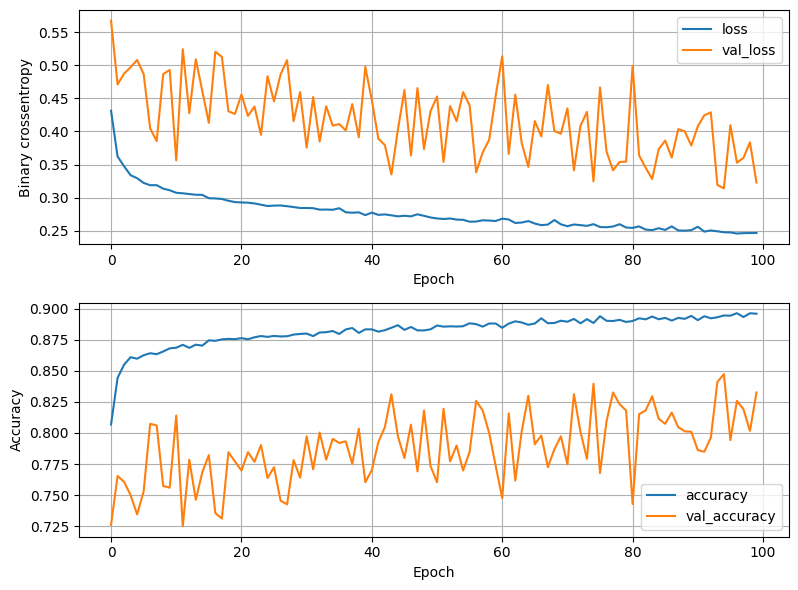

119/119 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8672
[0.3408665955066681, 0.8672450184822083]

Nodes:      32
DropOut:    0
LR:         0.001
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.4687 - accuracy: 0.7827 - val_loss: 0.5519 - val_accuracy: 0.6966
Epoch 2/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3772 - accuracy: 0.8368 - val_loss: 0.4639 - val_accuracy: 0.7765
Epoch 3/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3565 - accuracy: 0.8534 - val_loss: 0.5048 - val_accuracy: 0.7617
Epoch 4/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3461 - accuracy: 0.8570 - val_loss: 0.4519 - val_accuracy: 0.7859
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8588 - val_loss: 0.5240 - val_accuracy: 0.7503
Epoch 6/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3351 - accurac

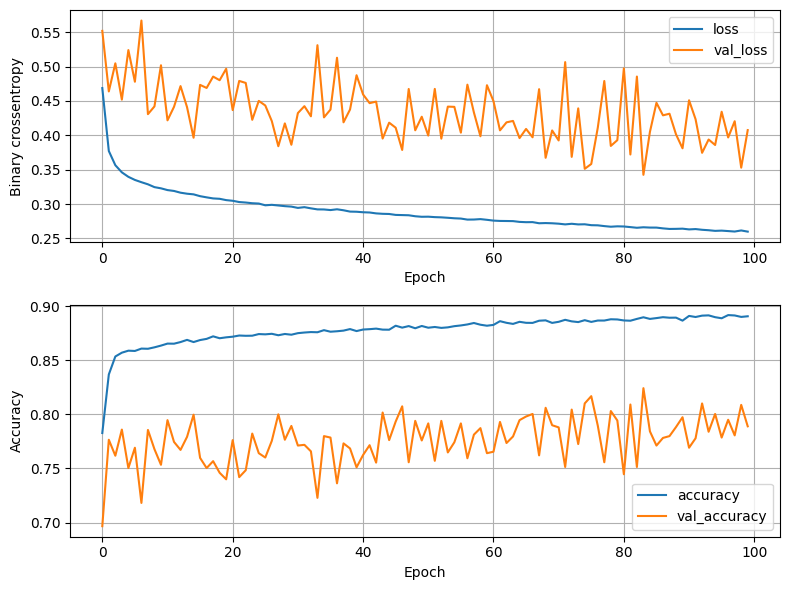

119/119 [==============================] - 0s 898us/step - loss: 0.3160 - accuracy: 0.8688
[0.3159830570220947, 0.8688222765922546]

Nodes:      32
DropOut:    0
LR:         0.001
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.5099 - accuracy: 0.7517 - val_loss: 0.5793 - val_accuracy: 0.6389
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8178 - val_loss: 0.5820 - val_accuracy: 0.6607
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8339 - val_loss: 0.5767 - val_accuracy: 0.6896
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8474 - val_loss: 0.5542 - val_accuracy: 0.7188
Epoch 5/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8513 - val_loss: 0.5111 - val_accuracy: 0.7483
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3471 - accur

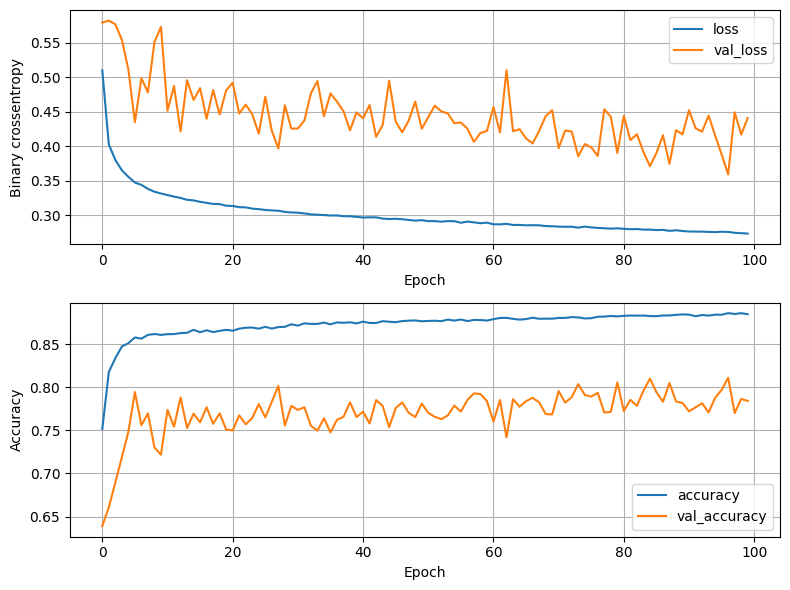

119/119 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8759
[0.30659061670303345, 0.8759200572967529]

Nodes:      32
DropOut:    0
LR:         0.001
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5511 - accuracy: 0.7297 - val_loss: 0.6633 - val_accuracy: 0.5909
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8051 - val_loss: 0.6219 - val_accuracy: 0.6201
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8220 - val_loss: 0.5875 - val_accuracy: 0.6557
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8360 - val_loss: 0.5337 - val_accuracy: 0.7104
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8452 - val_loss: 0.5186 - val_accuracy: 0.7282
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8525 

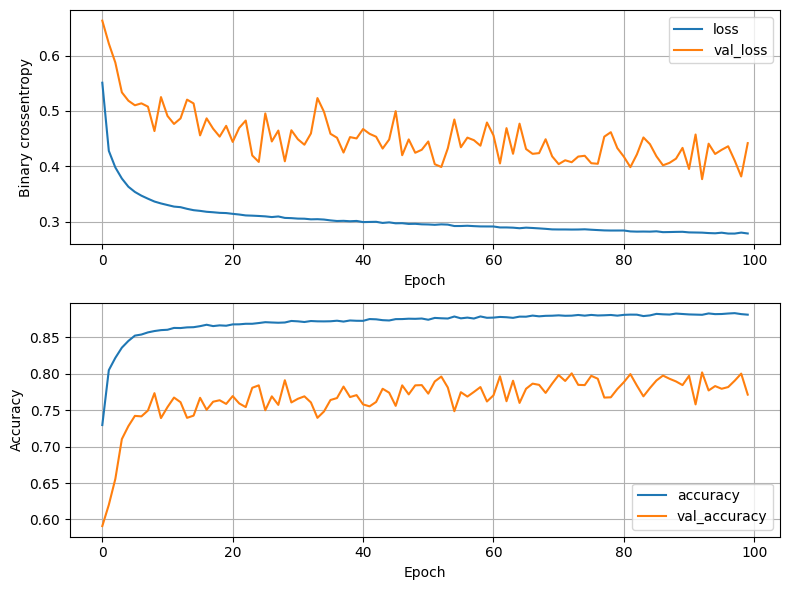

119/119 [==============================] - 0s 1ms/step - loss: 0.3031 - accuracy: 0.8746
[0.30306410789489746, 0.874605655670166]

Nodes:      32
DropOut:    0.2
LR:         0.1
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.5420 - accuracy: 0.7342 - val_loss: 0.7613 - val_accuracy: 0.4245
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.5645 - accuracy: 0.7024 - val_loss: 0.9108 - val_accuracy: 0.0906
Epoch 3/100
373/373 [==============================] - 1s 2ms/step - loss: 0.5918 - accuracy: 0.6334 - val_loss: 0.7645 - val_accuracy: 0.0000e+00
Epoch 4/100
373/373 [==============================] - 1s 1ms/step - loss: 0.5619 - accuracy: 0.6725 - val_loss: 0.9413 - val_accuracy: 0.6997
Epoch 5/100
373/373 [==============================] - 1s 1ms/step - loss: 0.5627 - accuracy: 0.6665 - val_loss: 0.7374 - val_accuracy: 0.9070
Epoch 6/100
373/373 [==============================] - 1s 1ms/step - loss: 0.5657 - acc

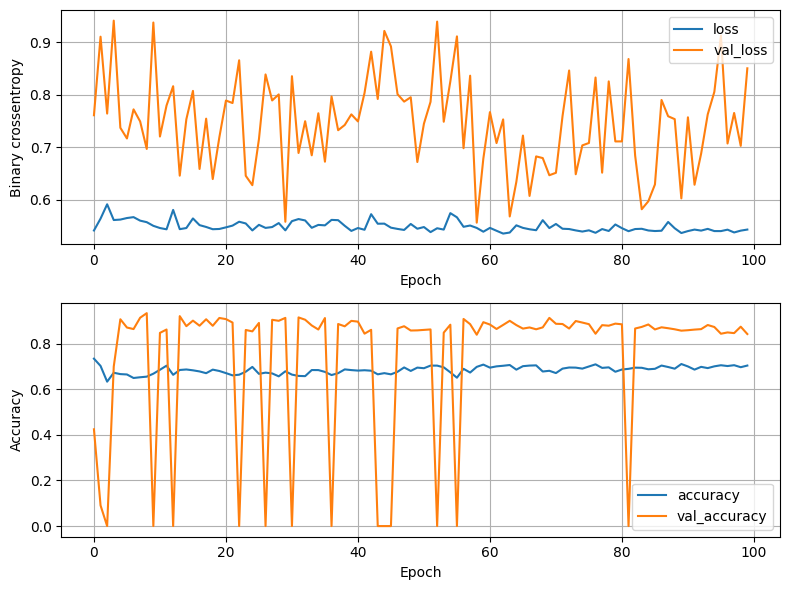

119/119 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.7965
[0.4655420482158661, 0.7965299487113953]

Nodes:      32
DropOut:    0.2
LR:         0.1
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4993 - accuracy: 0.7695 - val_loss: 0.6245 - val_accuracy: 0.6752
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.7966 - val_loss: 0.5766 - val_accuracy: 0.6181
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.7874 - val_loss: 0.5324 - val_accuracy: 0.5926
Epoch 4/100
187/187 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7716 - val_loss: 0.6340 - val_accuracy: 0.5013
Epoch 5/100
187/187 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7675 - val_loss: 0.6917 - val_accuracy: 0.4047
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4979 - accurac

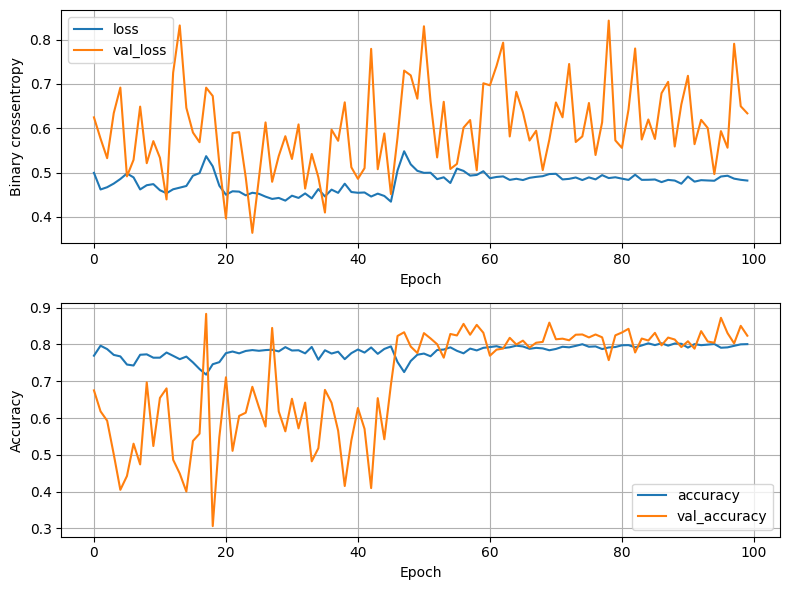

119/119 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8281
[0.42028605937957764, 0.8280757069587708]

Nodes:      32
DropOut:    0.2
LR:         0.1
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.4609 - accuracy: 0.7957 - val_loss: 0.5862 - val_accuracy: 0.6899
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8137 - val_loss: 0.5878 - val_accuracy: 0.6426
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8103 - val_loss: 0.4975 - val_accuracy: 0.7074
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8244 - val_loss: 0.4651 - val_accuracy: 0.7010
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8107 - val_loss: 0.5597 - val_accuracy: 0.6131
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4136 - accuracy: 0.8155 

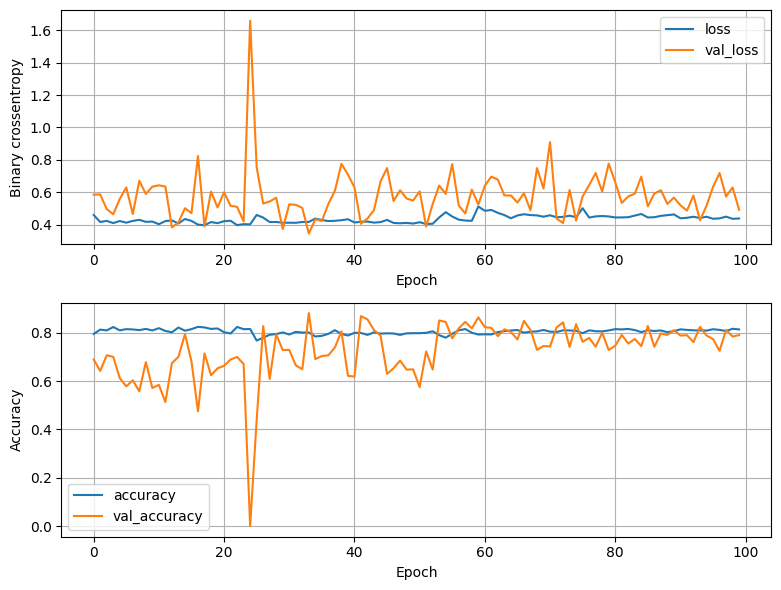

119/119 [==============================] - 0s 935us/step - loss: 0.4061 - accuracy: 0.8402
[0.4060633182525635, 0.8401682376861572]

Nodes:      32
DropOut:    0.2
LR:         0.005
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8044 - val_loss: 0.6067 - val_accuracy: 0.6671
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.8344 - val_loss: 0.4626 - val_accuracy: 0.7453
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.8466 - val_loss: 0.4453 - val_accuracy: 0.7527
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8490 - val_loss: 0.5201 - val_accuracy: 0.7178
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.8526 - val_loss: 0.4039 - val_accuracy: 0.7721
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3445 - acc

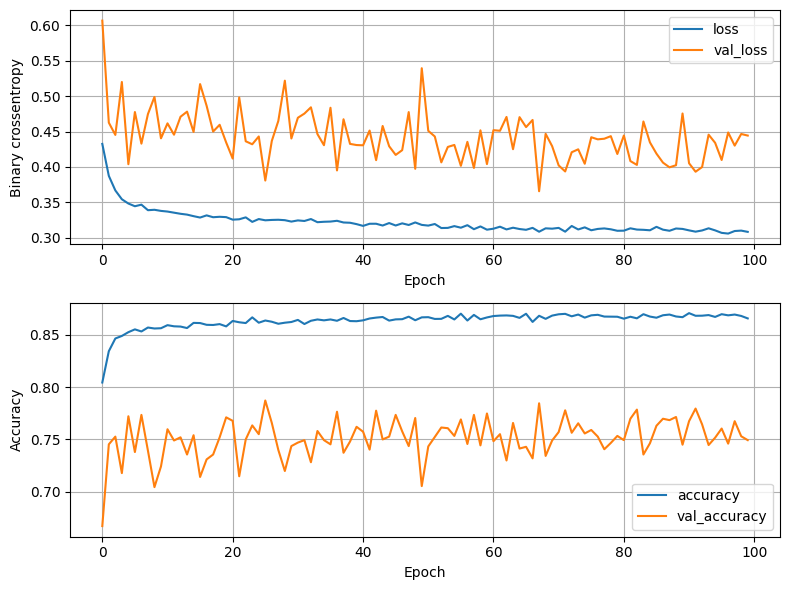

119/119 [==============================] - 0s 876us/step - loss: 0.3023 - accuracy: 0.8770
[0.30227819085121155, 0.8769716024398804]

Nodes:      32
DropOut:    0.2
LR:         0.005
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.7956 - val_loss: 0.5151 - val_accuracy: 0.7359
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3867 - accuracy: 0.8334 - val_loss: 0.6339 - val_accuracy: 0.6721
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8444 - val_loss: 0.4413 - val_accuracy: 0.7859
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8477 - val_loss: 0.5096 - val_accuracy: 0.7356
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8494 - val_loss: 0.4442 - val_accuracy: 0.7631
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3516 - ac

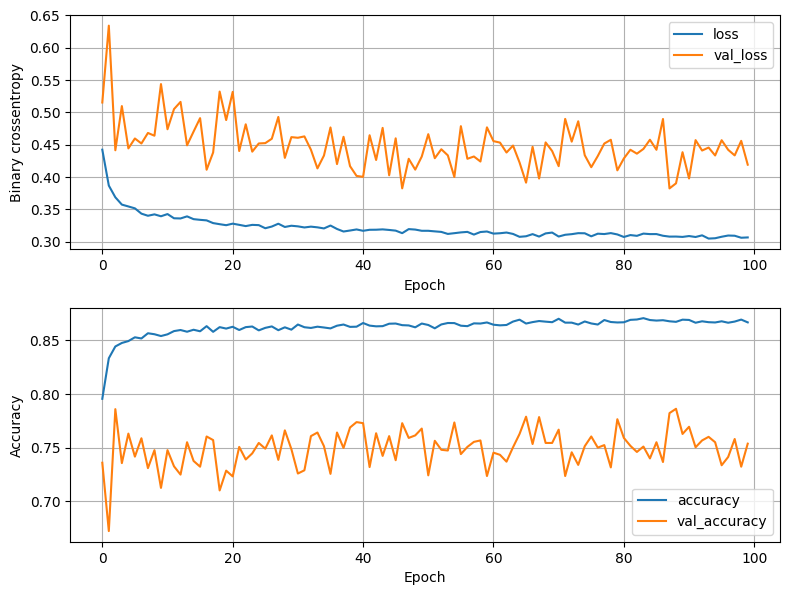

119/119 [==============================] - 0s 877us/step - loss: 0.3016 - accuracy: 0.8762
[0.30162718892097473, 0.8761829733848572]

Nodes:      32
DropOut:    0.2
LR:         0.005
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.4769 - accuracy: 0.7766 - val_loss: 0.6703 - val_accuracy: 0.6168
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8206 - val_loss: 0.5570 - val_accuracy: 0.7174
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8320 - val_loss: 0.5122 - val_accuracy: 0.7466
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8419 - val_loss: 0.5277 - val_accuracy: 0.7141
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8462 - val_loss: 0.4623 - val_accuracy: 0.7466
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8

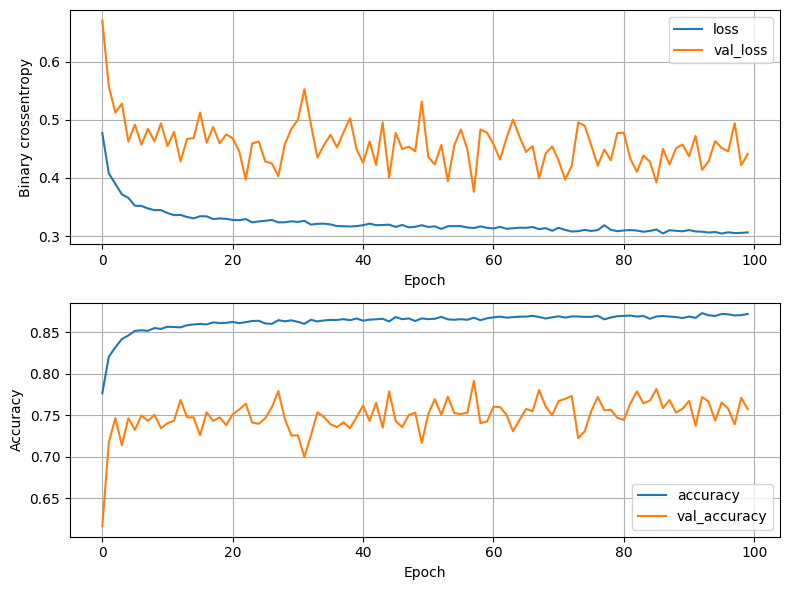

119/119 [==============================] - 0s 777us/step - loss: 0.2966 - accuracy: 0.8822
[0.29661378264427185, 0.882229208946228]

Nodes:      32
DropOut:    0.2
LR:         0.001
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 1ms/step - loss: 0.5008 - accuracy: 0.7522 - val_loss: 0.6232 - val_accuracy: 0.6302
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8047 - val_loss: 0.5942 - val_accuracy: 0.6715
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8221 - val_loss: 0.5576 - val_accuracy: 0.6946
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3907 - accuracy: 0.8299 - val_loss: 0.5448 - val_accuracy: 0.7064
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8376 - val_loss: 0.5514 - val_accuracy: 0.7101
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3734 - acc

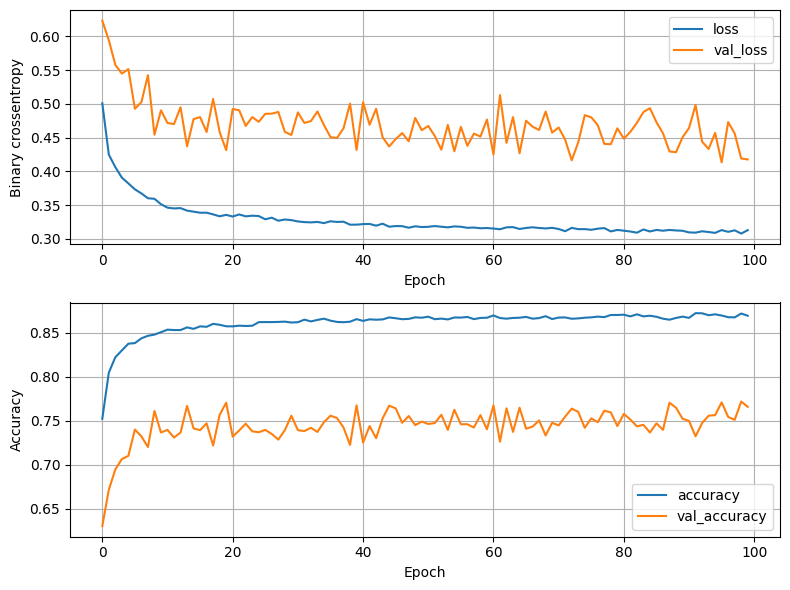

119/119 [==============================] - 0s 876us/step - loss: 0.3024 - accuracy: 0.8778
[0.3024013638496399, 0.8777602314949036]

Nodes:      32
DropOut:    0.2
LR:         0.001
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7418 - val_loss: 0.5946 - val_accuracy: 0.6523
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.7993 - val_loss: 0.5971 - val_accuracy: 0.6530
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8154 - val_loss: 0.5945 - val_accuracy: 0.6668
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8211 - val_loss: 0.5448 - val_accuracy: 0.7154
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8321 - val_loss: 0.5535 - val_accuracy: 0.7094
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3839 - acc

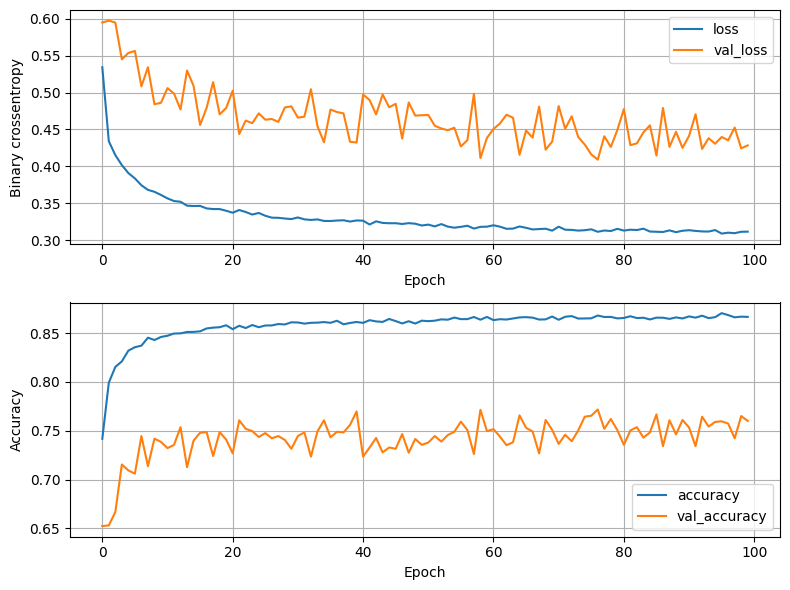

119/119 [==============================] - 0s 845us/step - loss: 0.3016 - accuracy: 0.8793
[0.30156370997428894, 0.8793375492095947]

Nodes:      32
DropOut:    0.2
LR:         0.001
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6066 - accuracy: 0.6532 - val_loss: 0.7175 - val_accuracy: 0.5245
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7848 - val_loss: 0.6233 - val_accuracy: 0.6416
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.7977 - val_loss: 0.6095 - val_accuracy: 0.6503
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8088 - val_loss: 0.5735 - val_accuracy: 0.6782
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8149 - val_loss: 0.5735 - val_accuracy: 0.6799
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8

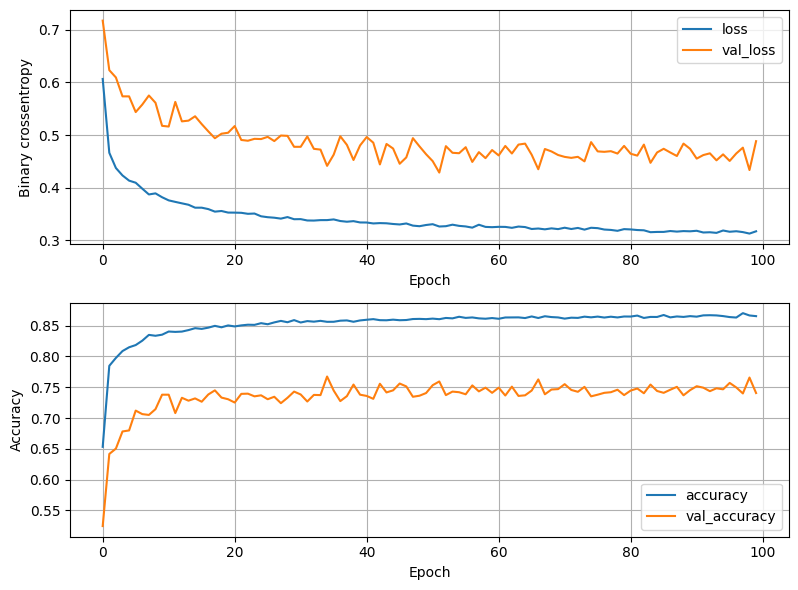

119/119 [==============================] - 0s 873us/step - loss: 0.3039 - accuracy: 0.8738
[0.30394619703292847, 0.8738170266151428]

Nodes:      64
DropOut:    0
LR:         0.1
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 1ms/step - loss: 0.4775 - accuracy: 0.7897 - val_loss: 0.8341 - val_accuracy: 0.7782
Epoch 2/100
373/373 [==============================] - 1s 2ms/step - loss: 0.4557 - accuracy: 0.7992 - val_loss: 0.4105 - val_accuracy: 0.8688
Epoch 3/100
373/373 [==============================] - 0s 996us/step - loss: 0.4069 - accuracy: 0.8275 - val_loss: 0.8248 - val_accuracy: 0.3181
Epoch 4/100
373/373 [==============================] - 0s 993us/step - loss: 0.4004 - accuracy: 0.8326 - val_loss: 0.4908 - val_accuracy: 0.7681
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8318 - val_loss: 0.5833 - val_accuracy: 0.7493
Epoch 6/100
373/373 [==============================] - 0s 987us/step - loss: 0.3858 - 

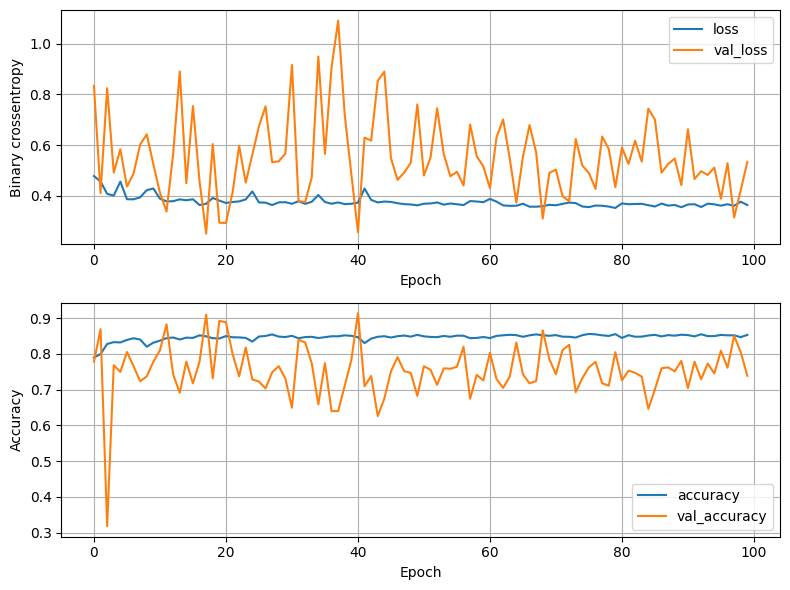

119/119 [==============================] - 0s 757us/step - loss: 0.3441 - accuracy: 0.8573
[0.344133585691452, 0.8572555184364319]

Nodes:      64
DropOut:    0
LR:         0.1
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4353 - accuracy: 0.8113 - val_loss: 0.7051 - val_accuracy: 0.6527
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8288 - val_loss: 0.5906 - val_accuracy: 0.5010
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.8357 - val_loss: 0.5809 - val_accuracy: 0.7245
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8276 - val_loss: 0.4218 - val_accuracy: 0.8560
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8357 - val_loss: 0.7761 - val_accuracy: 0.6634
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy

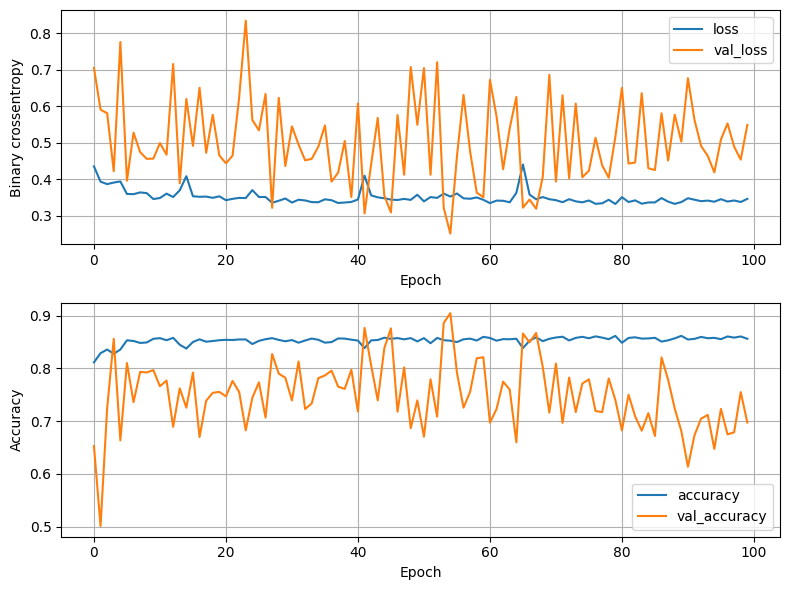

119/119 [==============================] - 0s 918us/step - loss: 0.3363 - accuracy: 0.8665
[0.3362506628036499, 0.8664563894271851]

Nodes:      64
DropOut:    0
LR:         0.1
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.4546 - accuracy: 0.7975 - val_loss: 0.3977 - val_accuracy: 0.8101
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8403 - val_loss: 0.6515 - val_accuracy: 0.6188
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8396 - val_loss: 0.6841 - val_accuracy: 0.5383
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8381 - val_loss: 0.6214 - val_accuracy: 0.6923
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8471 - val_loss: 0.5504 - val_accuracy: 0.7423
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8550 -

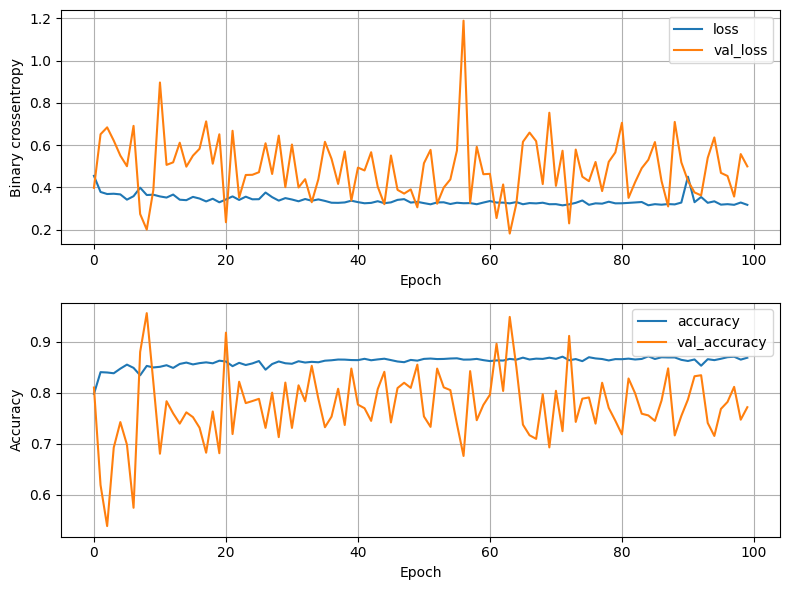

119/119 [==============================] - 0s 874us/step - loss: 0.3247 - accuracy: 0.8701
[0.3247316777706146, 0.8701366782188416]

Nodes:      64
DropOut:    0
LR:         0.005
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3844 - accuracy: 0.8350 - val_loss: 0.5224 - val_accuracy: 0.7443
Epoch 2/100
373/373 [==============================] - 0s 989us/step - loss: 0.3421 - accuracy: 0.8562 - val_loss: 0.4816 - val_accuracy: 0.7574
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8610 - val_loss: 0.4477 - val_accuracy: 0.7695
Epoch 4/100
373/373 [==============================] - 0s 989us/step - loss: 0.3249 - accuracy: 0.8636 - val_loss: 0.3717 - val_accuracy: 0.8067
Epoch 5/100
373/373 [==============================] - 0s 984us/step - loss: 0.3234 - accuracy: 0.8636 - val_loss: 0.5087 - val_accuracy: 0.7161
Epoch 6/100
373/373 [==============================] - 0s 989us/step - loss: 0.3181

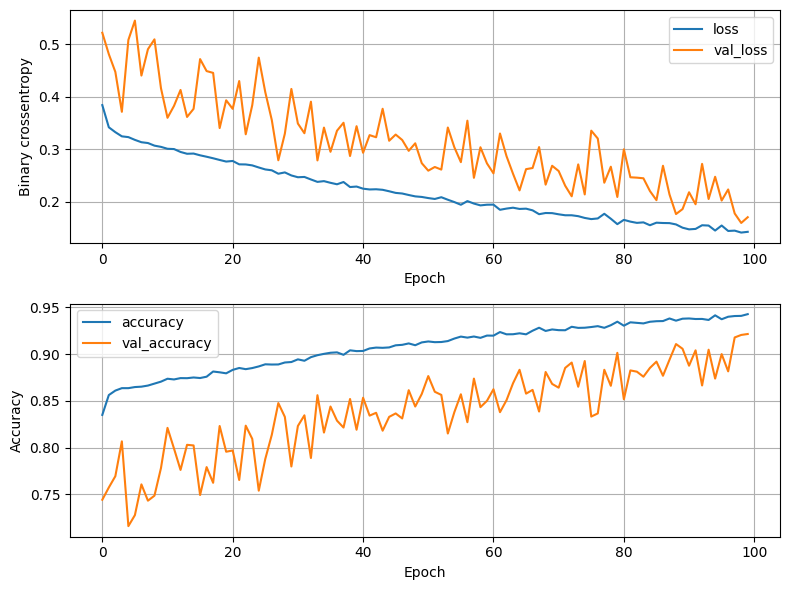

119/119 [==============================] - 0s 1ms/step - loss: 0.5997 - accuracy: 0.8504
[0.5997437834739685, 0.8504205942153931]

Nodes:      64
DropOut:    0
LR:         0.005
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.3947 - accuracy: 0.8265 - val_loss: 0.5786 - val_accuracy: 0.6970
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8533 - val_loss: 0.4425 - val_accuracy: 0.7765
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8603 - val_loss: 0.4130 - val_accuracy: 0.7983
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8596 - val_loss: 0.4611 - val_accuracy: 0.7664
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8645 - val_loss: 0.4882 - val_accuracy: 0.7587
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3179 - accurac

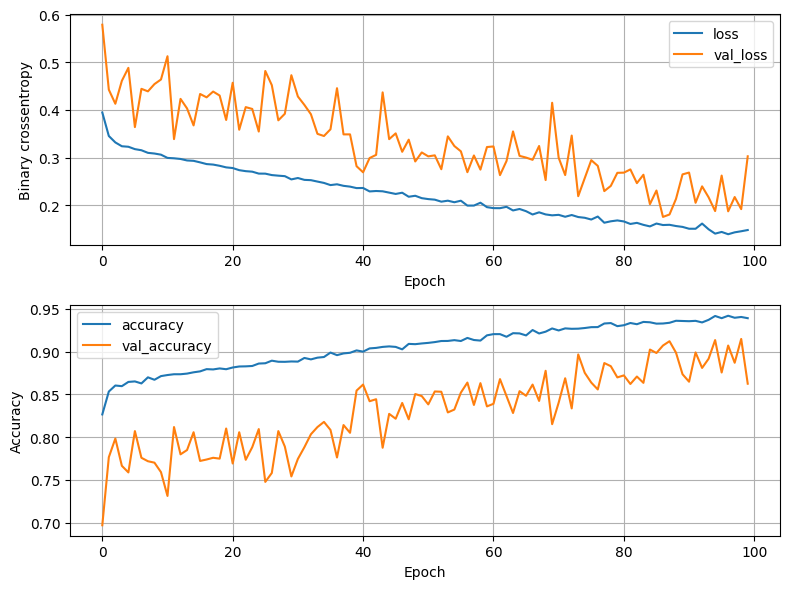

119/119 [==============================] - 0s 914us/step - loss: 0.5771 - accuracy: 0.8546
[0.5771237015724182, 0.8546267151832581]

Nodes:      64
DropOut:    0
LR:         0.005
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.4180 - accuracy: 0.8147 - val_loss: 0.5292 - val_accuracy: 0.7389
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8506 - val_loss: 0.6246 - val_accuracy: 0.7037
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8560 - val_loss: 0.4699 - val_accuracy: 0.7752
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8614 - val_loss: 0.5247 - val_accuracy: 0.7450
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8628 - val_loss: 0.5156 - val_accuracy: 0.7419
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8635

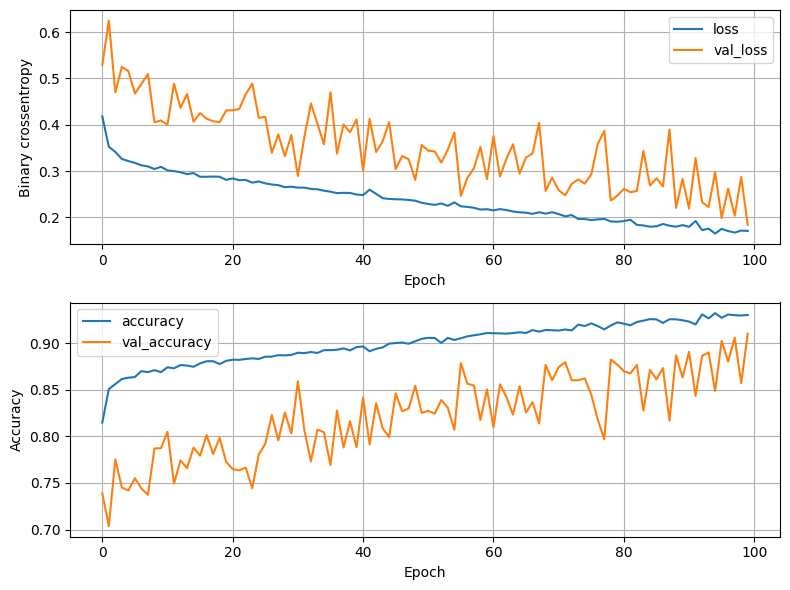

119/119 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.8441
[0.45705315470695496, 0.844111442565918]

Nodes:      64
DropOut:    0
LR:         0.001
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.4234 - accuracy: 0.8078 - val_loss: 0.5713 - val_accuracy: 0.7081
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8462 - val_loss: 0.5586 - val_accuracy: 0.7161
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.8546 - val_loss: 0.4994 - val_accuracy: 0.7554
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8591 - val_loss: 0.5124 - val_accuracy: 0.7638
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8618 - val_loss: 0.5759 - val_accuracy: 0.7164
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3230 - accurac

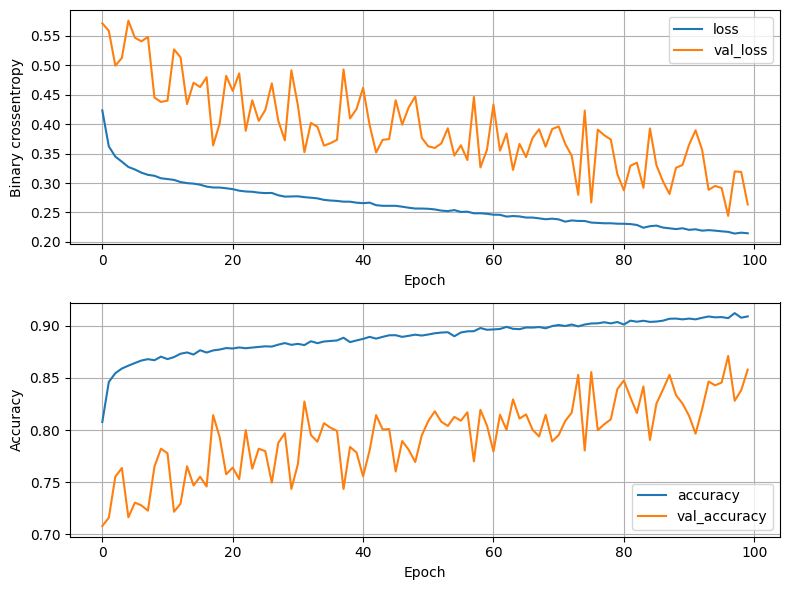

119/119 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8604
[0.34189075231552124, 0.8604100942611694]

Nodes:      64
DropOut:    0
LR:         0.001
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4506 - accuracy: 0.7950 - val_loss: 0.5775 - val_accuracy: 0.6775
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.8352 - val_loss: 0.5804 - val_accuracy: 0.7000
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8507 - val_loss: 0.5710 - val_accuracy: 0.7188
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8560 - val_loss: 0.4806 - val_accuracy: 0.7735
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8589 - val_loss: 0.4212 - val_accuracy: 0.7987
Epoch 6/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3285 - accura

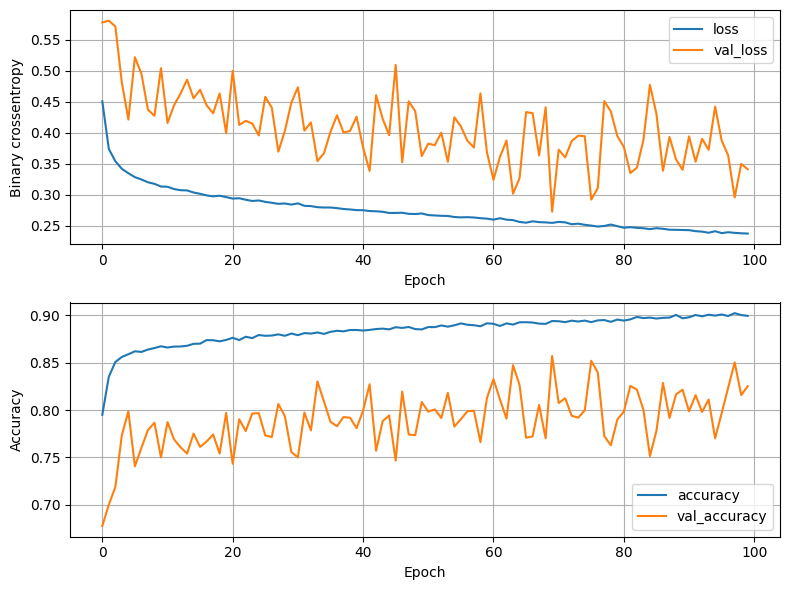

119/119 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8672
[0.32093939185142517, 0.8672450184822083]

Nodes:      64
DropOut:    0
LR:         0.001
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.4704 - accuracy: 0.7900 - val_loss: 0.5720 - val_accuracy: 0.6634
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8318 - val_loss: 0.5053 - val_accuracy: 0.7433
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8491 - val_loss: 0.5571 - val_accuracy: 0.7282
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8551 - val_loss: 0.4527 - val_accuracy: 0.7886
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8578 - val_loss: 0.5033 - val_accuracy: 0.7601
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8575 

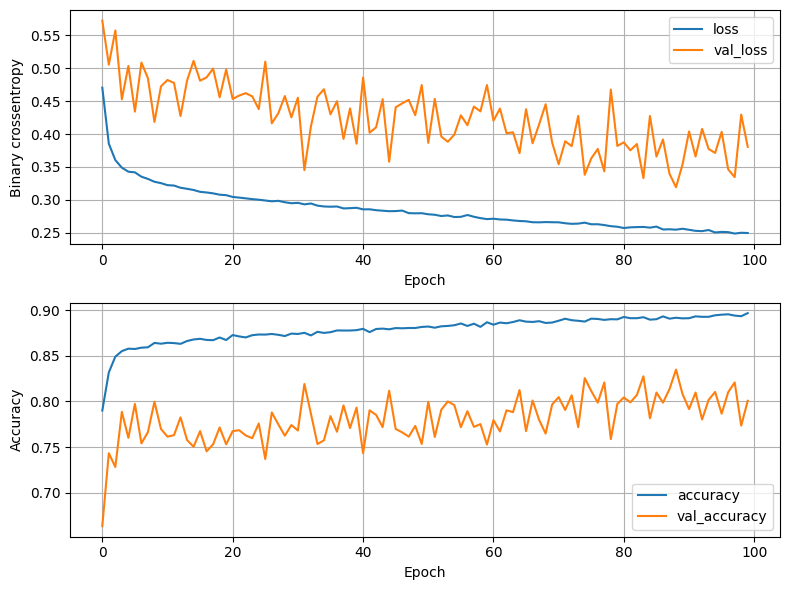

119/119 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.8720
[0.3160456418991089, 0.8719768524169922]

Nodes:      64
DropOut:    0.2
LR:         0.1
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.5599 - accuracy: 0.7242 - val_loss: 0.8176 - val_accuracy: 0.0956
Epoch 2/100
373/373 [==============================] - 1s 1ms/step - loss: 0.6349 - accuracy: 0.6361 - val_loss: 1.0622 - val_accuracy: 3.3557e-04
Epoch 3/100
373/373 [==============================] - 1s 1ms/step - loss: 0.6726 - accuracy: 0.6258 - val_loss: 0.9990 - val_accuracy: 0.0000e+00
Epoch 4/100
373/373 [==============================] - 1s 1ms/step - loss: 0.6750 - accuracy: 0.6245 - val_loss: 0.9494 - val_accuracy: 0.0000e+00
Epoch 5/100
373/373 [==============================] - 1s 1ms/step - loss: 0.6672 - accuracy: 0.6257 - val_loss: 1.0851 - val_accuracy: 0.0000e+00
Epoch 6/100
373/373 [==============================] - 1s 1ms/step - loss: 

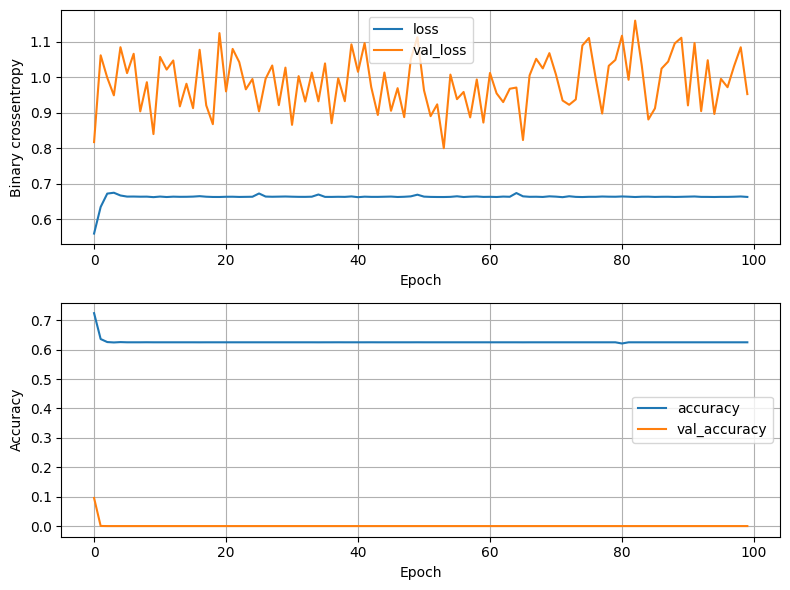

119/119 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.6480
[0.6510894894599915, 0.6480020880699158]

Nodes:      64
DropOut:    0.2
LR:         0.1
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7520 - val_loss: 0.7993 - val_accuracy: 0.3020
Epoch 2/100
187/187 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7454 - val_loss: 0.7469 - val_accuracy: 0.3134
Epoch 3/100
187/187 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.7180 - val_loss: 0.8556 - val_accuracy: 0.2477
Epoch 4/100
187/187 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6936 - val_loss: 0.7825 - val_accuracy: 0.1752
Epoch 5/100
187/187 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.6815 - val_loss: 0.7495 - val_accuracy: 0.2581
Epoch 6/100
187/187 [==============================] - 0s 2ms/step - loss: 0.6762 - accurac

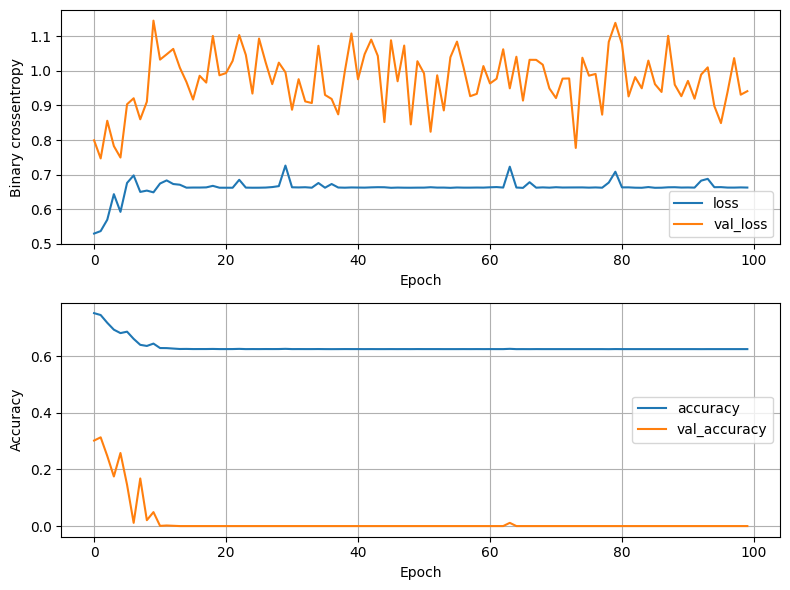

119/119 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6480
[0.6517872214317322, 0.6480020880699158]

Nodes:      64
DropOut:    0.2
LR:         0.1
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.4978 - accuracy: 0.7706 - val_loss: 0.6482 - val_accuracy: 0.6030
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8003 - val_loss: 0.7721 - val_accuracy: 0.3644
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7878 - val_loss: 0.5439 - val_accuracy: 0.5339
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7826 - val_loss: 0.5188 - val_accuracy: 0.9185
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7336 - val_loss: 0.6150 - val_accuracy: 0.7899
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7555 -

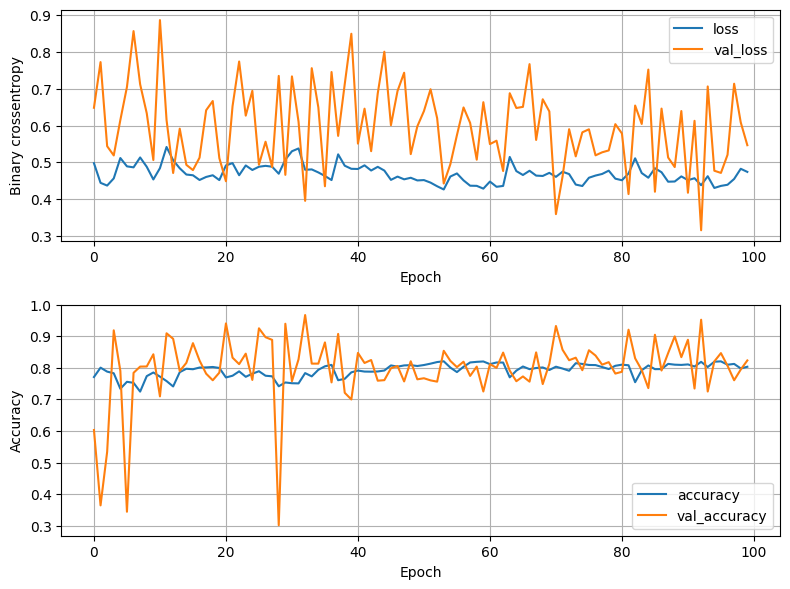

119/119 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8354
[0.4151875674724579, 0.8354364037513733]

Nodes:      64
DropOut:    0.2
LR:         0.005
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 0.4067 - accuracy: 0.8195 - val_loss: 0.5899 - val_accuracy: 0.6752
Epoch 2/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3616 - accuracy: 0.8468 - val_loss: 0.5227 - val_accuracy: 0.6893
Epoch 3/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3496 - accuracy: 0.8524 - val_loss: 0.5793 - val_accuracy: 0.6909
Epoch 4/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3440 - accuracy: 0.8561 - val_loss: 0.5231 - val_accuracy: 0.7366
Epoch 5/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3381 - accuracy: 0.8588 - val_loss: 0.5469 - val_accuracy: 0.7369
Epoch 6/100
373/373 [==============================] - 1s 1ms/step - loss: 0.3386 - accur

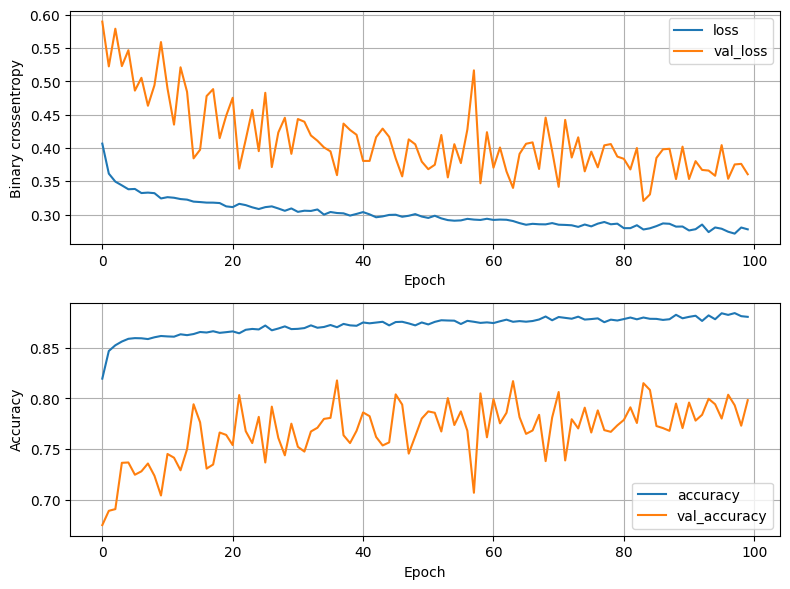

119/119 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.8796
[0.3095671236515045, 0.8796004056930542]

Nodes:      64
DropOut:    0.2
LR:         0.005
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4251 - accuracy: 0.8102 - val_loss: 0.5013 - val_accuracy: 0.7305
Epoch 2/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8427 - val_loss: 0.4979 - val_accuracy: 0.7359
Epoch 3/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8520 - val_loss: 0.4472 - val_accuracy: 0.7661
Epoch 4/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8511 - val_loss: 0.5442 - val_accuracy: 0.7067
Epoch 5/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8549 - val_loss: 0.5336 - val_accuracy: 0.7087
Epoch 6/100
187/187 [==============================] - 0s 2ms/step - loss: 0.3353 - accur

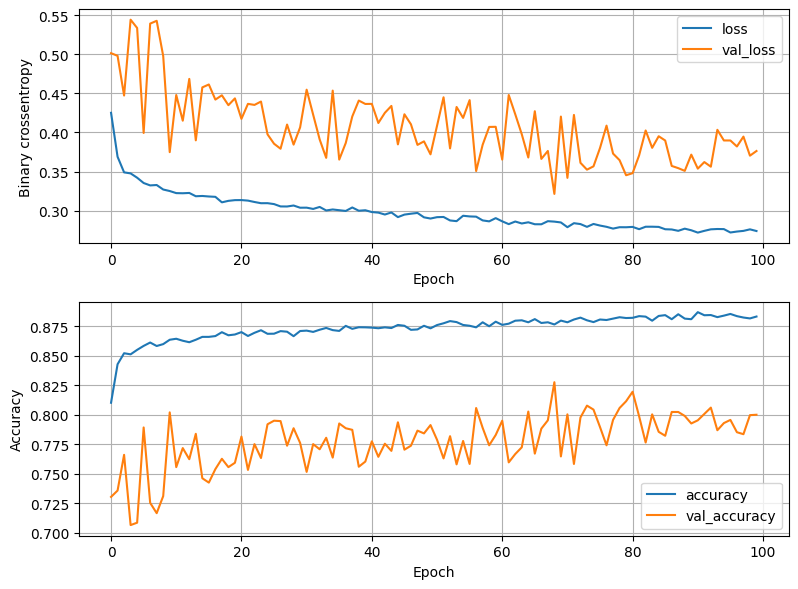

119/119 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8801
[0.3001824617385864, 0.8801261782646179]

Nodes:      64
DropOut:    0.2
LR:         0.005
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.4317 - accuracy: 0.8069 - val_loss: 0.4854 - val_accuracy: 0.7567
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8378 - val_loss: 0.4823 - val_accuracy: 0.7557
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8479 - val_loss: 0.5100 - val_accuracy: 0.7104
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8507 - val_loss: 0.4828 - val_accuracy: 0.7349
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8555 - val_loss: 0.5680 - val_accuracy: 0.7040
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8560

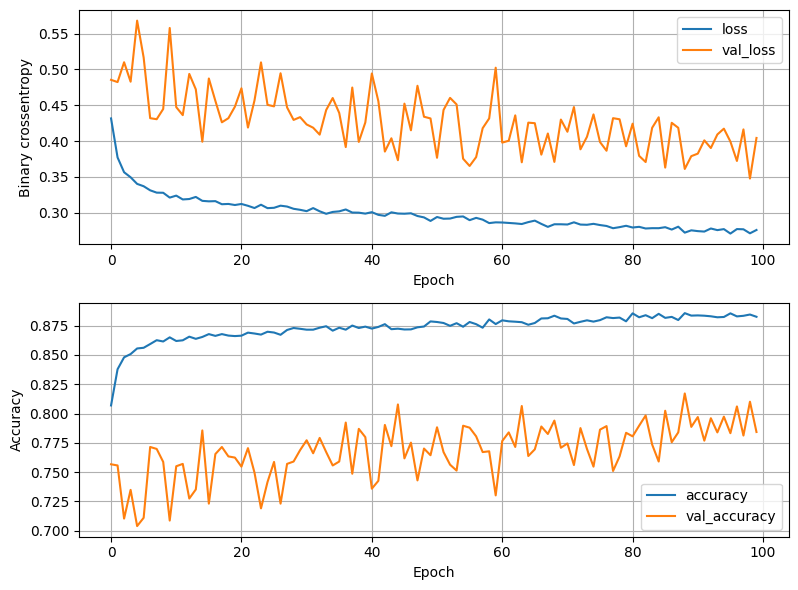

119/119 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8791
[0.29846471548080444, 0.8790746331214905]

Nodes:      64
DropOut:    0.2
LR:         0.001
Batch Size: 32

Epoch 1/100
373/373 [==============================] - 1s 1ms/step - loss: 0.4564 - accuracy: 0.7915 - val_loss: 0.5399 - val_accuracy: 0.7007
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8275 - val_loss: 0.5293 - val_accuracy: 0.7225
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8395 - val_loss: 0.5054 - val_accuracy: 0.7463
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8434 - val_loss: 0.5415 - val_accuracy: 0.7205
Epoch 5/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8455 - val_loss: 0.4800 - val_accuracy: 0.7570
Epoch 6/100
373/373 [==============================] - 0s 1ms/step - loss: 0.3501 - accu

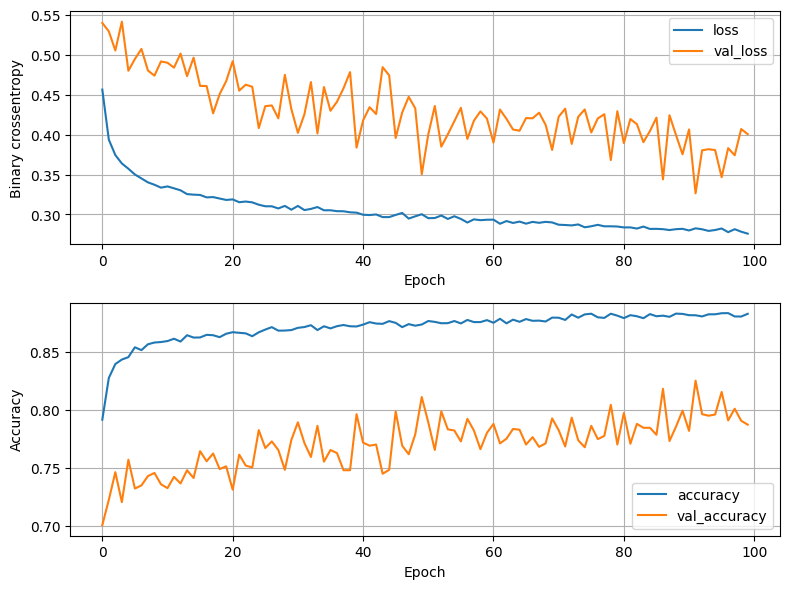

119/119 [==============================] - 0s 812us/step - loss: 0.2944 - accuracy: 0.8788
[0.2944072186946869, 0.878811776638031]

Nodes:      64
DropOut:    0.2
LR:         0.001
Batch Size: 64

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 0.4830 - accuracy: 0.7768 - val_loss: 0.6031 - val_accuracy: 0.6453
Epoch 2/100
187/187 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8194 - val_loss: 0.5019 - val_accuracy: 0.7285
Epoch 3/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8328 - val_loss: 0.5309 - val_accuracy: 0.7285
Epoch 4/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8403 - val_loss: 0.5723 - val_accuracy: 0.7124
Epoch 5/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8479 - val_loss: 0.4588 - val_accuracy: 0.7611
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.3604 - accu

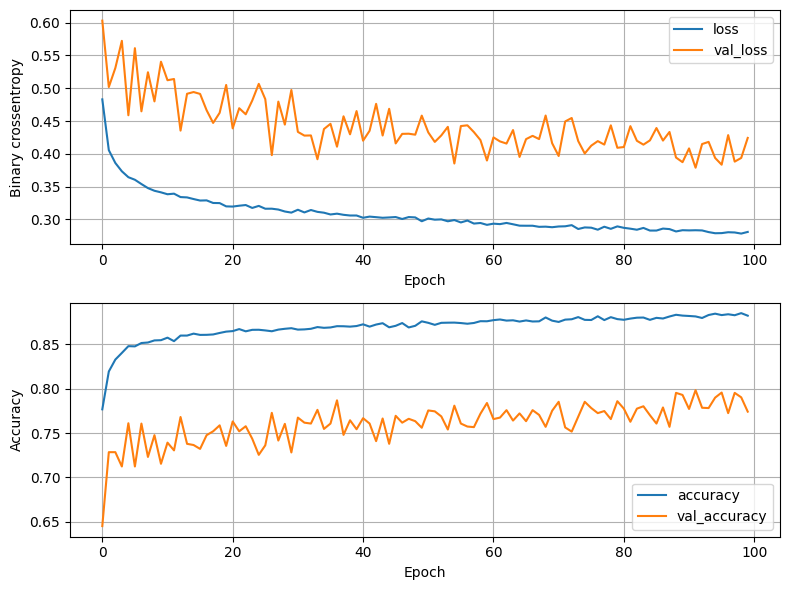

119/119 [==============================] - 0s 920us/step - loss: 0.2971 - accuracy: 0.8809
[0.29708224534988403, 0.8809148073196411]

Nodes:      64
DropOut:    0.2
LR:         0.001
Batch Size: 128

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5088 - accuracy: 0.7632 - val_loss: 0.6450 - val_accuracy: 0.6091
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8100 - val_loss: 0.6014 - val_accuracy: 0.6383
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8190 - val_loss: 0.5500 - val_accuracy: 0.7050
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8287 - val_loss: 0.5502 - val_accuracy: 0.7084
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8361 - val_loss: 0.6002 - val_accuracy: 0.6953
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8

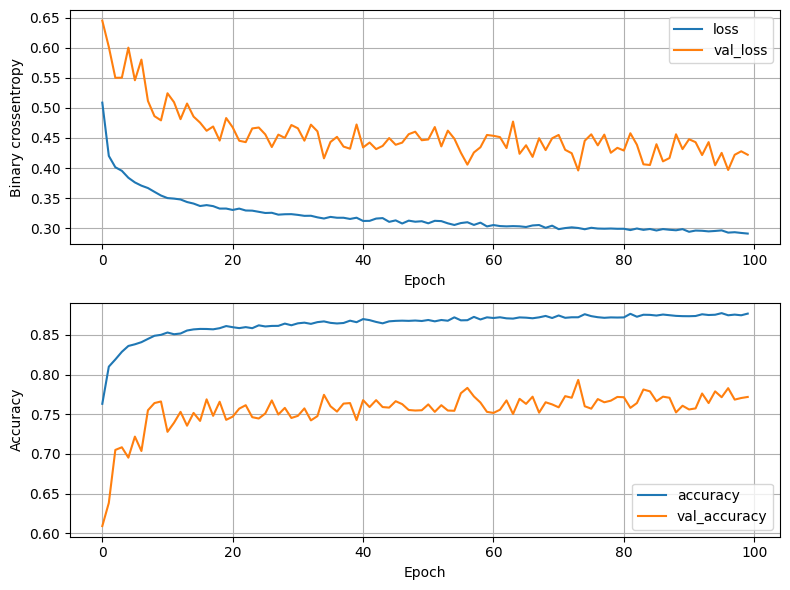

119/119 [==============================] - 0s 912us/step - loss: 0.2991 - accuracy: 0.8780
[0.29906317591667175, 0.8780231475830078]


In [32]:
# Variable to save the least loss value from all model trainings
least_val_loss = float('inf')

# Variable to save the least loss model from all model trainings
least_loss_model = None

# Number of training cycles
epochs = 100

# For cycle to test different parameters combination for the model training (finding the model with Lowest loss - Highest accuracy)
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f'''
Nodes:      {num_nodes}
DropOut:    {dropout_prob}
LR:         {lr}
Batch Size: {batch_size}
''')
                model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, Y_valid)
                print(val_loss)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model
                    

In [35]:
# Prediction and value conversion from the least loss model (0 - 1)
Y_pred = least_loss_model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)
Y_pred

119/119 [==============================] - 0s 933us/step


array([0, 1, 0, ..., 1, 1, 1])

In [38]:
# Neural Network model classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1387
           1       0.86      0.95      0.90      2417

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.86      3804
weighted avg       0.87      0.87      0.87      3804

